# **<ins>*Leak in Main Air Blower to Regenerator Pipeline*</ins>**

## Introduction

The FCC (Fluidized Catalytic Cracking) condenser is a critical component in refinery operations. It process sweet Vacuum Gas Oil as a feed and cracks heavy oil into lighter oils like LPG and Gasoline.

A reduction in air flow rate to the FCC regenerator lowers its temperature, which can result in incomplete combustion ("behind the burn"), reduced catalyst regeneration efficiency, and a decline in plant throughput. To ensure safety, this situation may trigger an Emergency Shutdown (ESD). This project utilizes Machine Learning (ML) techniques to detect anomalies in FCC condenser efficiency.

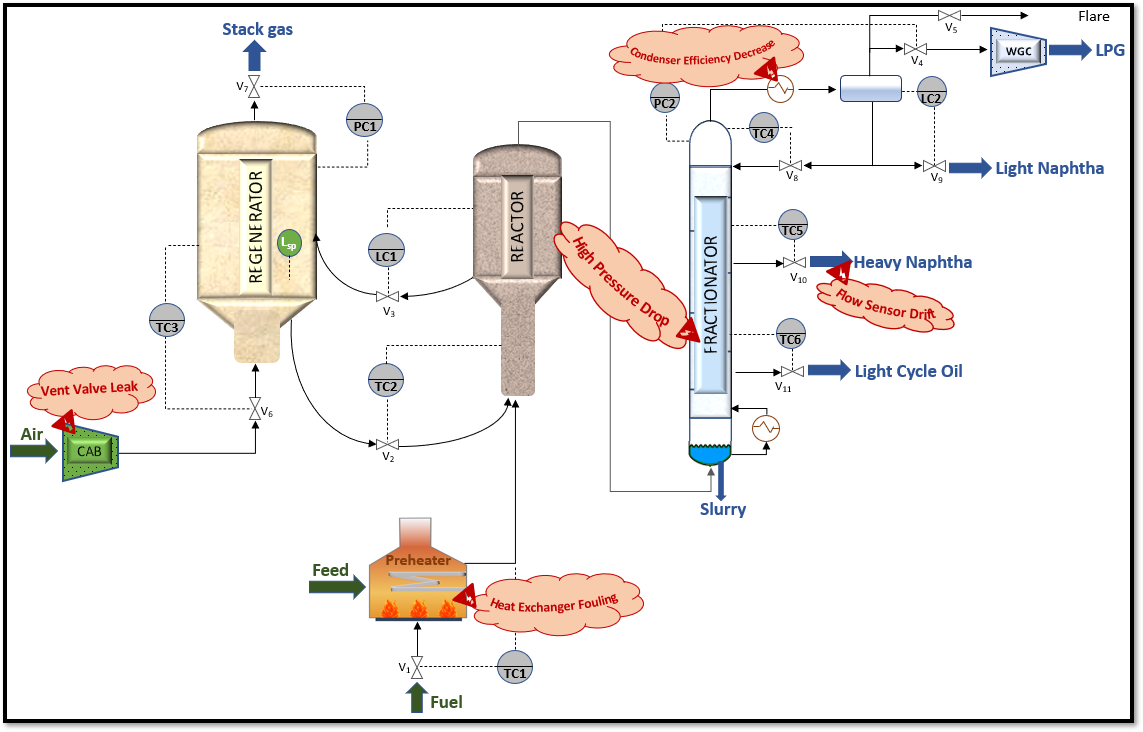

## Data Preprocessing

The dataset contains operational parameters, including temperature, pressure, flow rates, and velocities. The following preprocessing steps were performed:

1. Handling Missing Values: Missing values were filled using mean imputation.
2. Feature Scaling: Standardized using StandardScaler.

## Exploratory Data Analysis (EDA)

EDA was conducted to visualize trends and detect potential anomalies. Key findings:

1. Line plot revealed variations in parameters like Temperature, Pressure, Flowrate, etc.
2. PCA highlighted underlying structure in the dataset.

## Anomaly Detection Techniques

**1. Principal Component Analysis (PCA)**

PCA reduced high-dimensional data to two principal components.<br>
Anomalies were detected by analyzing data points far from the normal cluster.

**2. Autoencoder (Deep Learning)**

A neural network trained to reconstruct normal data patterns.<br>
Reconstruction error was used to flag high-error data points as anomalies.

## **Data Cleaning, Feature Engineering, Predictive Modeling**

Importing libraries and datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 12})

In [2]:
df = pd.read_excel('columns.xlsx')
col = df['Symbol'].values
col = col.tolist()

In [3]:
df_stableFeedFlow = pd.read_csv(r'https://raw.githubusercontent.com/AshuPraja13/FCC-abnormality-detection/main/NOC_stableFeedFlow_outputs.csv',header=None)
df_stableFeedFlow.set_index = df_stableFeedFlow.iloc[:,0]
df_stableFeedFlow = df_stableFeedFlow.drop(columns=0)
df_stableFeedFlow.columns= col
df_stableFeedFlow.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3      T2  \
2510  164.81  78.793  460.44  34.4    -6.4  28  2.6791  1565.6  615.99   
2250  165.12  79.937  461.05  34.4    -6.4  28  2.6831  1563.9  616.00   
1550  165.11  76.402  461.20  34.4    -6.4  28  2.6796  1562.9  616.00   
1035  165.12  79.052  460.65  34.4    -6.4  28  2.6847  1566.3  615.99   
2047  164.86  79.886  461.45  34.4    -6.4  28  2.6766  1559.8  616.00   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
2510  969.03  ...  1641.5   214.26   2972.2  313.64  509.70  627.94  47.332   
2250  969.01  ...  1648.5   210.68   3010.2  314.99  509.90  628.21  45.753   
1550  968.95  ...  1644.8   212.73   2952.6  311.70  509.74  628.01  49.726   
1035  969.04  ...  1647.3   207.21   2989.2  314.01  509.85  628.00  46.855   
2047  968.97  ...  1633.3   220.75   2972.4  314.41  509.57  627.92  46.378   

          V8     V10     V11  
2510  49.465  49.062  47.113  
2250  49.871  49.654  47.494  
1550  49.476  49.609  47.294  
1035  49.687  48.861  47.431  
2047  49.340  49.324  46.653  

[5 rows x 46 columns]

In [4]:
df_varyingFeedFlow=pd.read_csv(r'https://raw.githubusercontent.com/AshuPraja13/FCC-abnormality-detection/main/NOC_varyingFeedFlow_outputs.csv',header=None)
df_varyingFeedFlow.set_index = df_varyingFeedFlow.iloc[:,0]
df_varyingFeedFlow = df_varyingFeedFlow.drop(columns=0)
df_varyingFeedFlow.columns= col
df_varyingFeedFlow.sample(5)

F3    Tatm      T1    P4  deltaP  P6    Fair      T3      T2  \
5059  162.09  80.015  460.63  34.4    -6.4  28  2.6343  1547.7  616.00   
2478  164.47  79.050  461.41  34.4    -6.4  28  2.6695  1557.7  616.00   
9389  165.23  80.033  460.58  34.4    -6.4  28  2.6840  1567.5  616.01   
1497  166.99  75.731  461.42  34.4    -6.4  28  2.7136  1573.2  616.00   
82    165.05  76.114  460.42  34.4    -6.4  28  2.6792  1567.3  615.99   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
5059  969.02  ...  1592.0   231.02   2575.4  307.04  505.86  622.37  53.798   
2478  968.95  ...  1630.7   222.70   2904.2  312.66  509.04  627.10  48.261   
9389  969.00  ...  1643.5   211.99   3015.5  315.17  509.97  628.21  45.564   
1497  969.01  ...  1675.3   211.15   3280.2  317.02  512.42  631.67  44.666   
82    968.97  ...  1638.2   215.91   2943.7  311.38  509.69  628.02  50.118   

          V8     V10     V11  
5059  43.872  47.175  44.676  
2478  48.494  49.154  46.557  
9389  49.931  48.979  47.204  
1497  53.997  51.098  48.790  
82    49.383  49.131  46.919  

[5 rows x 46 columns]

In [5]:
df_CAB_valveLeak = pd.read_csv(r'https://raw.githubusercontent.com/AshuPraja13/FCC-abnormality-detection/main/CAB_valveLeak_outputs.csv',header=None)
df_CAB_valveLeak.set_index = df_CAB_valveLeak.iloc[:,0]
df_CAB_valveLeak = df_CAB_valveLeak.drop(columns=0)
df_CAB_valveLeak.columns= col
df_CAB_valveLeak.sample(5)

F3    Tatm      T1    P4  deltaP    P6    Fair      T3      T2  \
197   165.18  77.406  461.11  34.4    -6.4  28.0  2.6816  1563.8  615.99   
806   164.92  79.932  460.89  34.4    -6.4  28.0  2.6809  1563.7  616.00   
902   164.92  79.636  461.34  34.4    -6.4  28.0  2.6813  1560.9  616.00   
1215  165.20  77.640  460.40  34.4    -6.4  28.0  2.6815  1568.3  615.99   
31    165.02  75.406  461.02  34.4    -6.4  28.0  2.6804  1563.5  615.99   

          Tr  ...    FLCO  FSlurry  FReflux    Tfra     T10     T20      V9  \
197   968.98  ...  1639.0   211.98   2960.0  312.47  509.75  627.97  48.717   
806   969.02  ...  1645.1   215.73   3011.8  315.08  509.89  628.31  45.701   
902   969.04  ...  1644.2   213.84   2999.0  314.65  509.84  628.15  46.168   
1215  968.96  ...  1648.9   212.58   2992.6  313.26  509.96  628.34  47.964   
31    968.99  ...  1640.3   214.24   2945.1  310.94  509.80  628.09  50.727   

          V8     V10     V11  
197   49.468  48.745  46.961  
806   49.881  49.905  47.298  
902   49.741  49.456  47.251  
1215  49.871  49.755  47.506  
31    49.484  48.764  47.031  

[5 rows x 46 columns]

EDA

In [6]:
df_CAB_valveLeak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   F3           1440 non-null   float64
 1   Tatm         1440 non-null   float64
 2   T1           1440 non-null   float64
 3   P4           1440 non-null   float64
 4   deltaP       1440 non-null   float64
 5   P6           1440 non-null   float64
 6   Fair         1440 non-null   float64
 7   T3           1440 non-null   float64
 8   T2           1440 non-null   float64
 9   Tr           1440 non-null   float64
 10  Treg         1440 non-null   float64
 11  Lsp          1440 non-null   float64
 12  Tcyc         1440 non-null   float64
 13  Tcyc - Treg  1440 non-null   float64
 14  Cco,sg       1440 non-null   int64  
 15  Co2,sg       1440 non-null   float64
 16  P5           1440 non-null   float64
 17  V4           1440 non-null   float64
 18  V6           1440 non-null   float64
 19  V7    

In [7]:
df_CAB_valveLeak.describe().T

count          mean           std           min           25%  \
F3           1440.0    165.012694  1.582447e-01    164.530000    164.890000   
Tatm         1440.0     78.342193  1.491834e+00     74.981000     77.191500   
T1           1440.0    460.899750  3.939347e-01    459.580000    460.650000   
P4           1440.0     34.400000  8.884870e-13     34.400000     34.400000   
deltaP       1440.0     -6.400000  2.486461e-05     -6.400600     -6.400000   
P6           1440.0     27.999999  2.635231e-05     27.999000     28.000000   
Fair         1440.0      2.680753  4.127865e-03      2.622600      2.678700   
T3           1440.0   1564.149375  2.865350e+00   1555.800000   1562.200000   
T2           1440.0    616.000063  7.019004e-03    615.980000    616.000000   
Tr           1440.0    969.001563  6.849410e-02    967.440000    968.980000   
Treg         1440.0   1249.965208  1.430992e-01   1248.800000   1249.900000   
Lsp          1440.0     29.693318  1.550688e-01     27.519000     29.620000   
Tcyc         1440.0   1255.261111  1.539885e-01   1253.800000   1255.200000   
Tcyc - Treg  1440.0      5.294570  8.754049e-02      4.489500      5.258475   
Cco,sg       1440.0  29875.119444  1.532124e+02  29012.000000  29838.000000   
Co2,sg       1440.0      0.012540  3.653610e-04      0.009197      0.012382   
P5           1440.0     24.900000  6.752501e-13     24.900000     24.900000   
V4           1440.0     46.263708  3.639806e-01     45.379000     46.008750   
V6           1440.0     27.734301  1.285316e+00     24.580000     28.212000   
V7           1440.0     54.595515  8.454750e-02     53.401000     54.554000   
V3           1440.0     46.992527  1.936154e-02     46.924000     46.979000   
V1           1440.0     57.939251  2.065033e-01     57.343000     57.801000   
V2           1440.0     45.301624  8.714133e-02     45.013000     45.255000   
Frgc         1440.0  49594.152778  7.121163e+01  48812.000000  49549.750000   
Fsc          1440.0  49593.238194  7.082435e+01  49072.000000  49549.000000   
ACAB         1440.0    280.764625  1.370150e+00    275.270000    279.730000   
AWGC         1440.0    204.625465  2.503719e+00    198.600000    202.837500   
F5           1440.0   1990.668125  7.094397e+00   1970.200000   1985.900000   
F7           1440.0   3737.294375  7.181960e+00   3636.300000   3733.900000   
Fsg          1440.0    160.845076  2.493207e-01    157.320000    160.720000   
FV11         1440.0  28116.156250  2.742243e+02  27445.000000  27925.000000   
P1           1440.0     14.637996  1.825900e-04     14.637000     14.638000   
P2           1440.0     35.041662  2.336692e-02     34.976000     35.027000   
FLPG         1440.0   3037.774583  4.419007e+01   2931.400000   3006.075000   
FLN          1440.0   3917.950139  4.534886e+01   3853.200000   3878.675000   
FHN          1440.0    708.818424  3.439050e+00    697.990000    706.720000   
FLCO         1440.0   1643.658125  3.754342e+00   1632.900000   1640.800000   
FSlurry      1440.0    213.913611  3.699680e+00    205.930000    211.107500   
FReflux      1440.0   2984.433264  1.878808e+01   2938.600000   2972.300000   
Tfra         1440.0    313.547090  1.204799e+00    310.710000    312.657500   
T10          1440.0    509.836076  1.319542e-01    509.500000    509.740000   
T20          1440.0    628.161611  1.590902e-01    627.840000    628.040000   
V9           1440.0     47.511276  1.506524e+00     45.383000     46.214000   
V8           1440.0     49.688417  1.914883e-01     49.287000     49.533750   
V10          1440.0     49.368097  4.820776e-01     47.879000     49.072000   
V11          1440.0     47.220298  2.061357e-01     46.630000     47.065750   

                      50%           75%           max  
F3             165.020000    165.140000    165.480000  
Tatm            78.746000     79.687250     80.070000  
T1             460.910000    461.140000    462.050000  
P4              34.400000     34.400000     34.400000  
deltaP          -6.4

<AxesSubplot:>

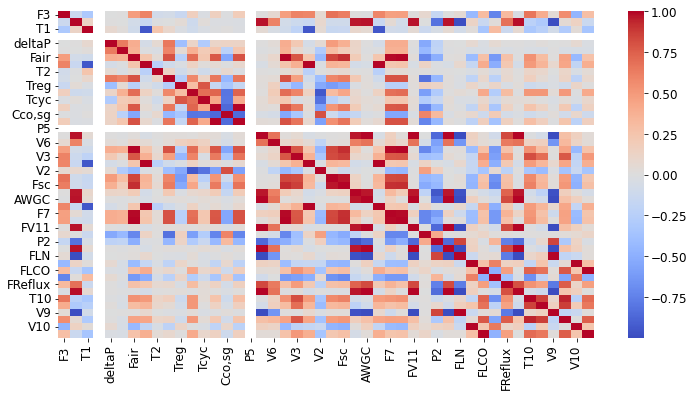

In [8]:
sns.heatmap(df_CAB_valveLeak.corr(),cmap='coolwarm')

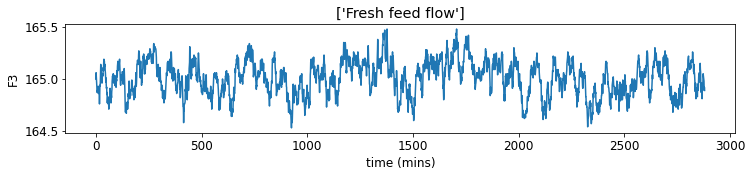

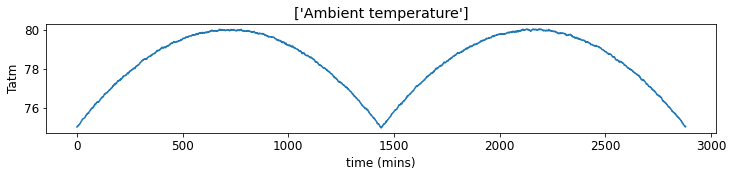

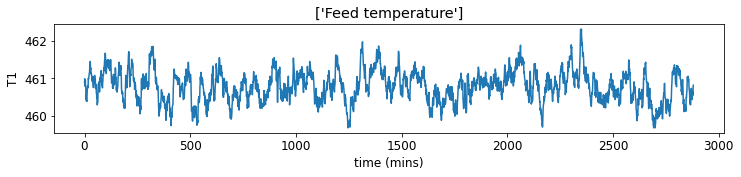

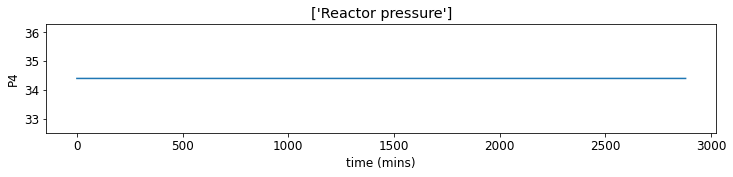

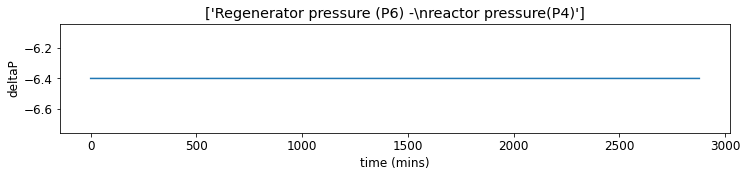

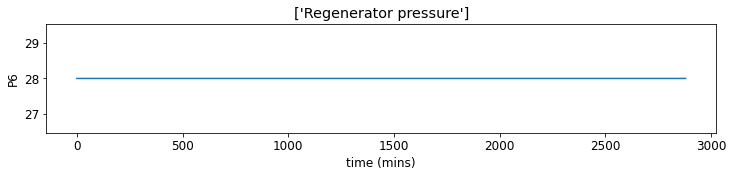

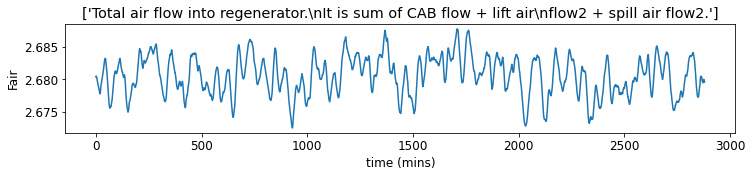

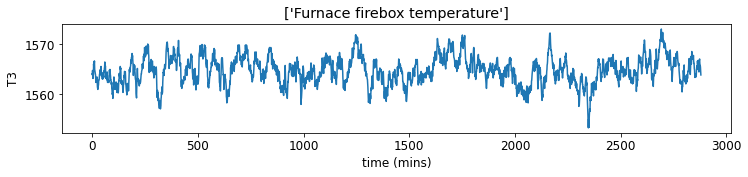

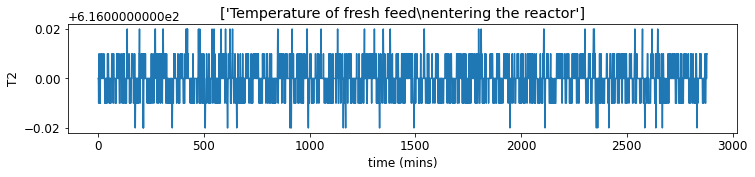

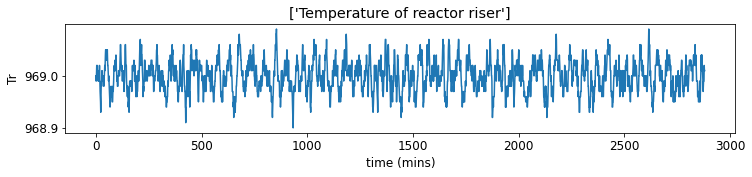

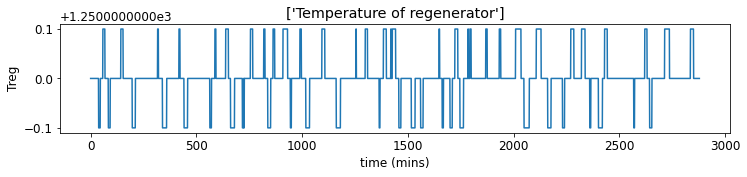

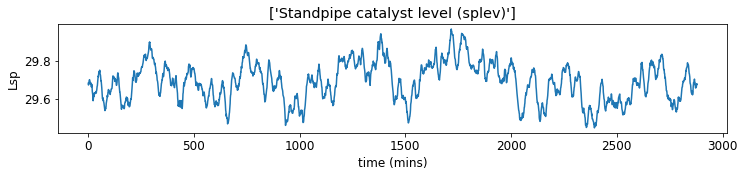

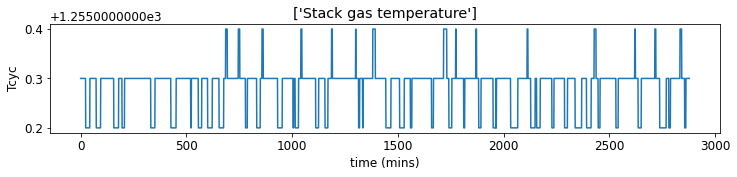

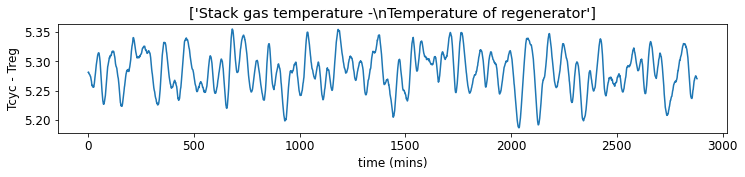

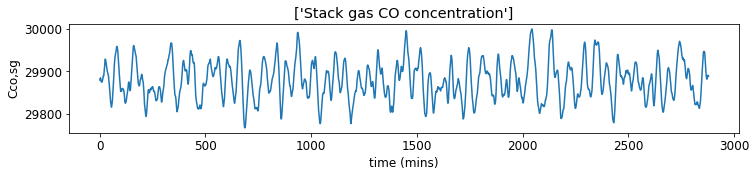

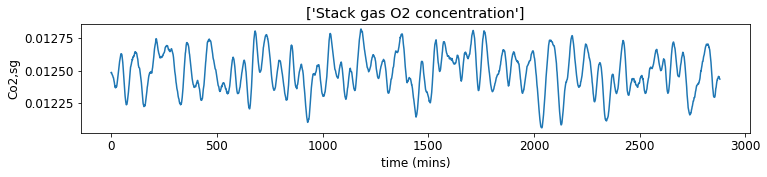

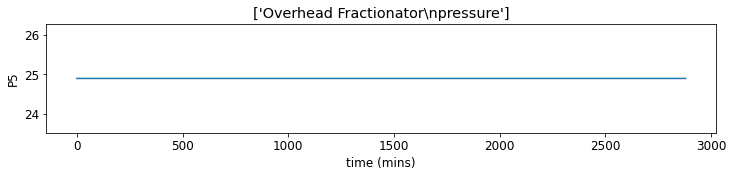

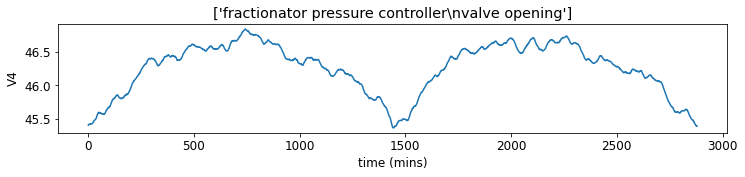

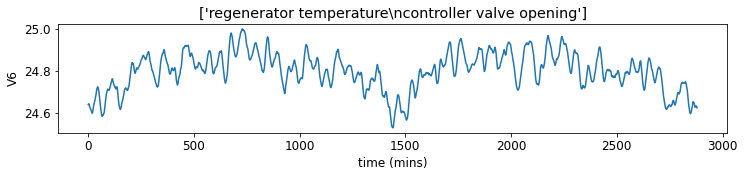

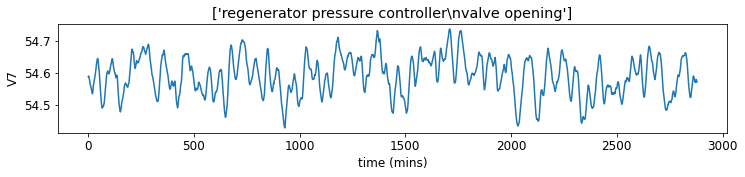

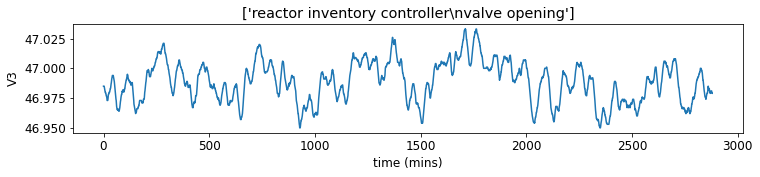

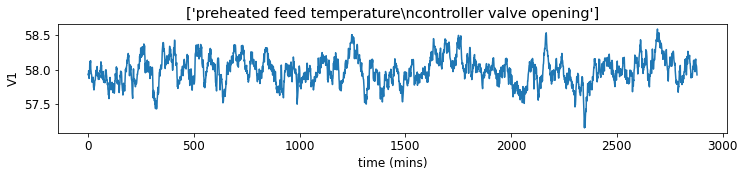

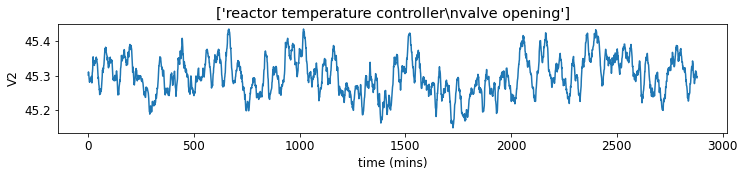

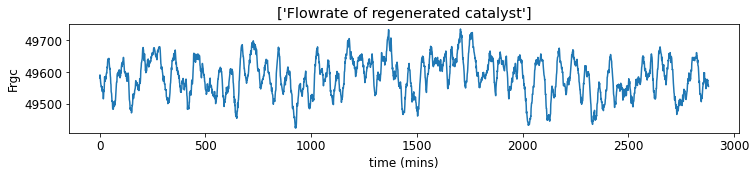

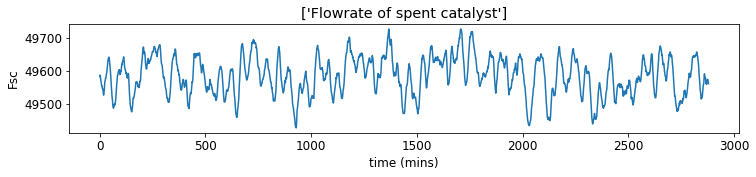

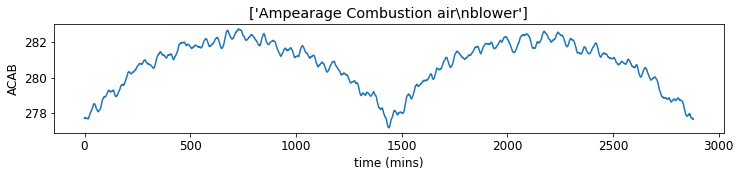

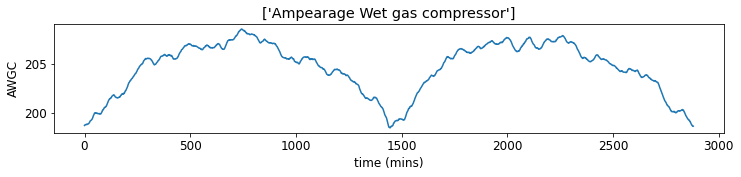

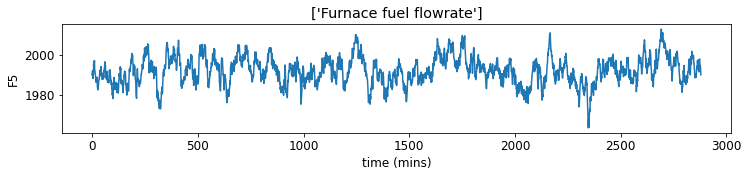

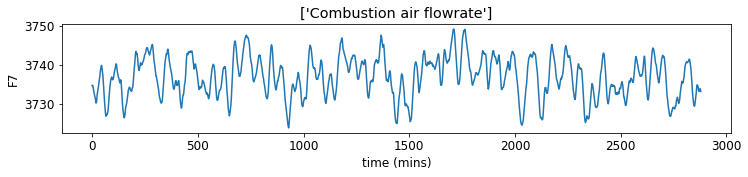

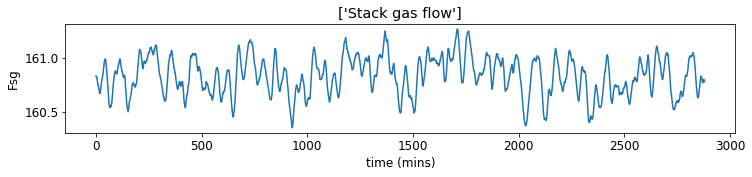

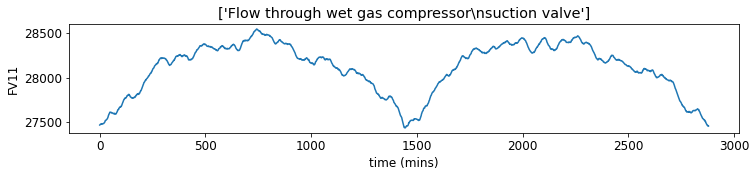

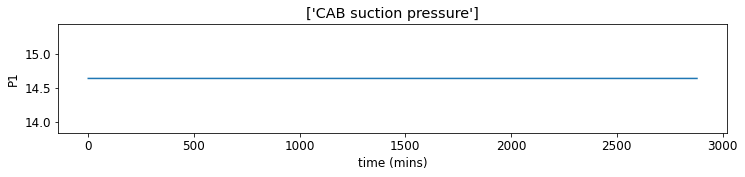

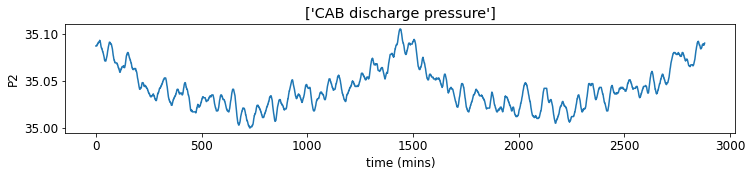

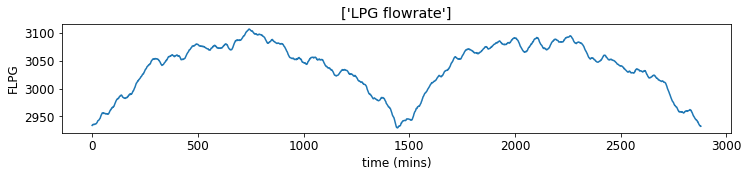

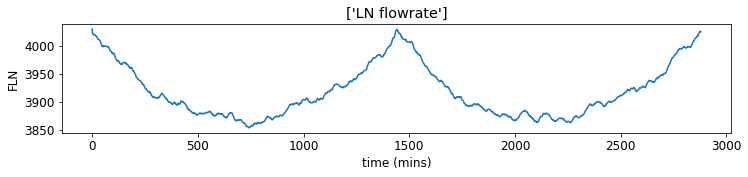

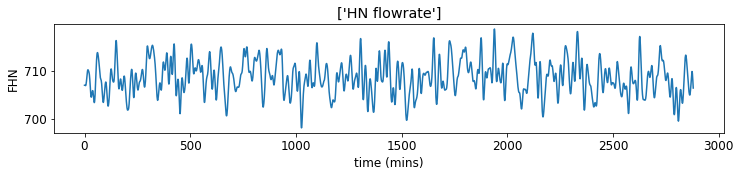

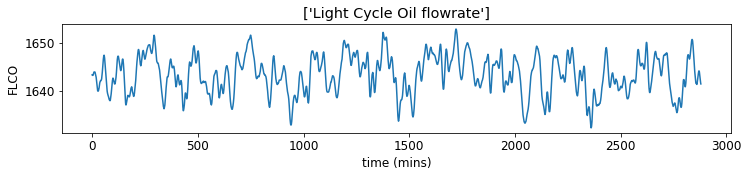

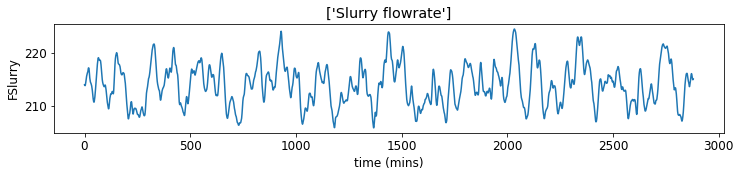

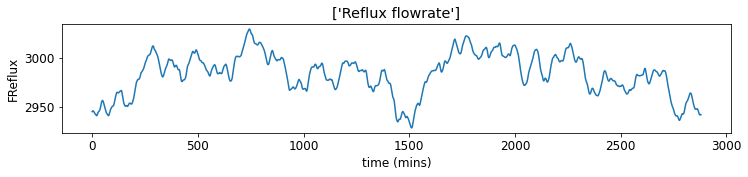

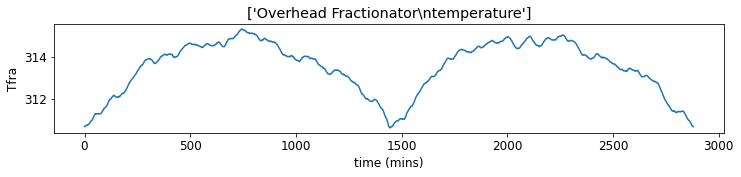

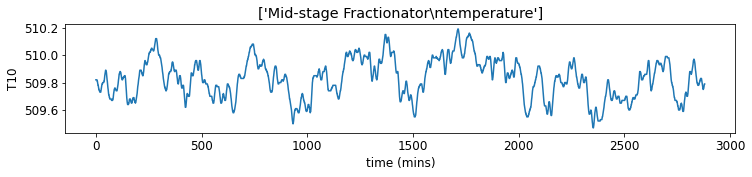

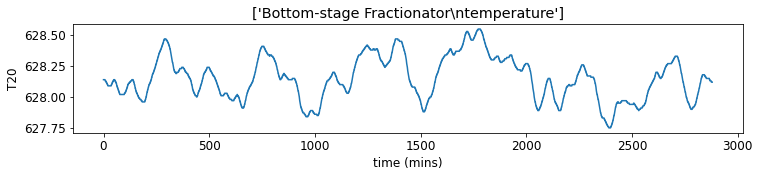

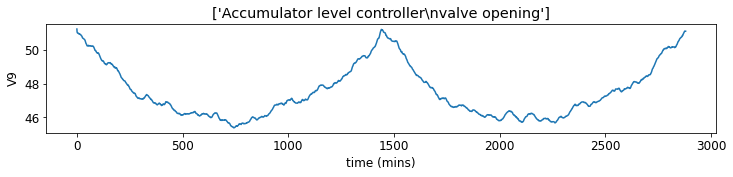

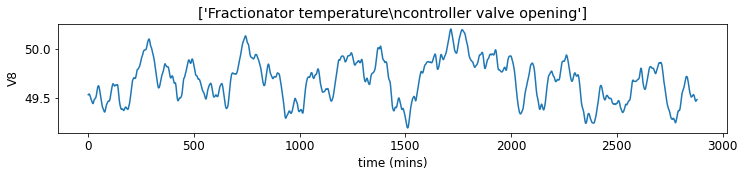

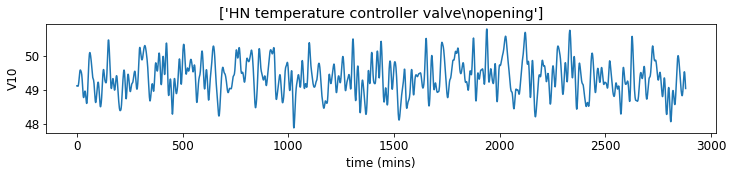

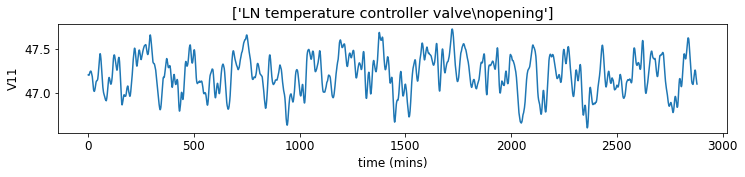

In [9]:
for n,i in enumerate(df_stableFeedFlow.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_stableFeedFlow[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

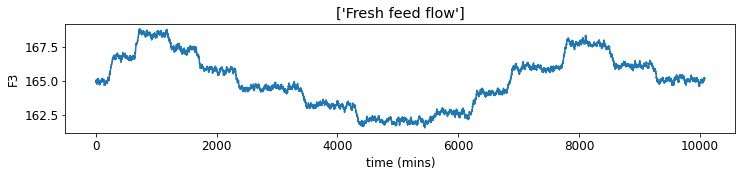

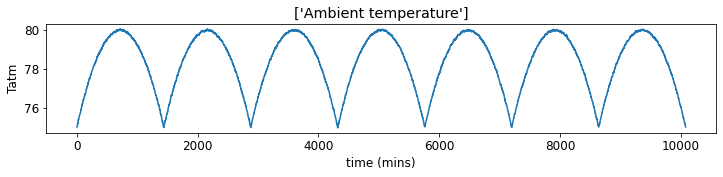

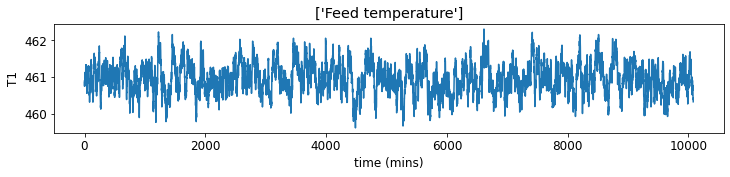

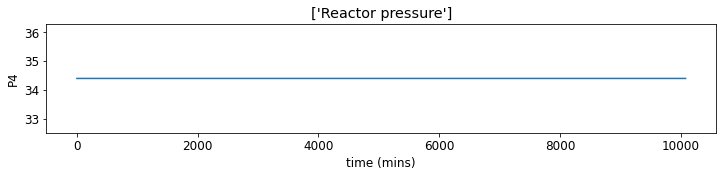

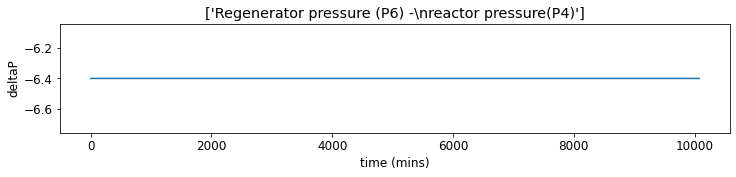

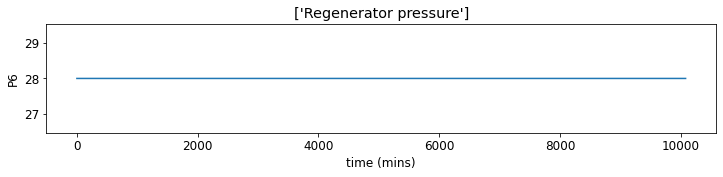

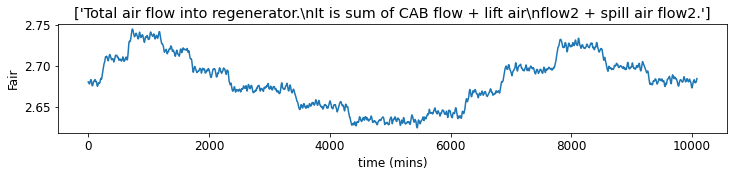

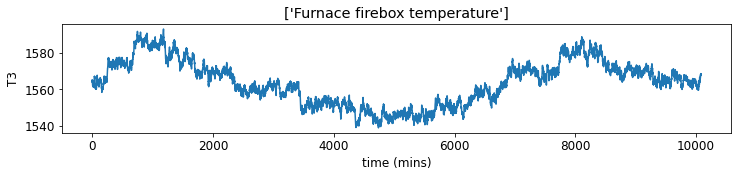

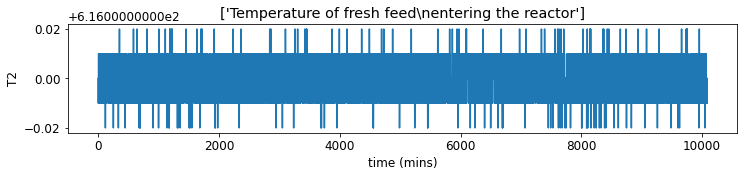

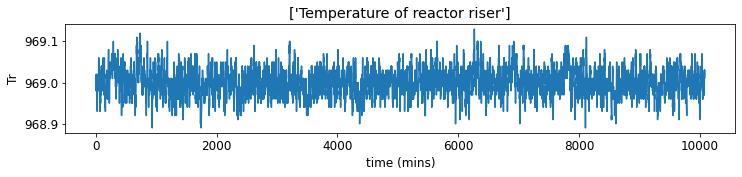

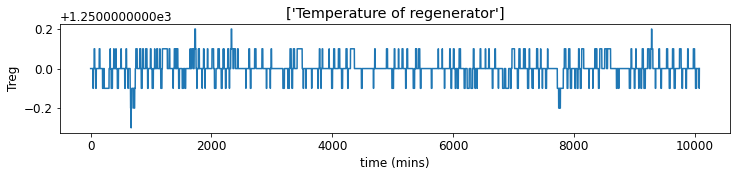

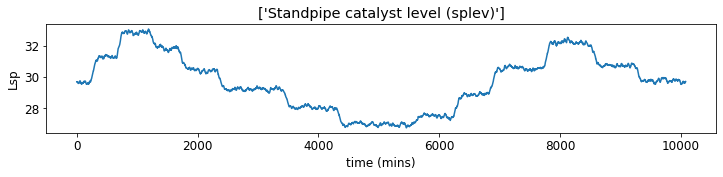

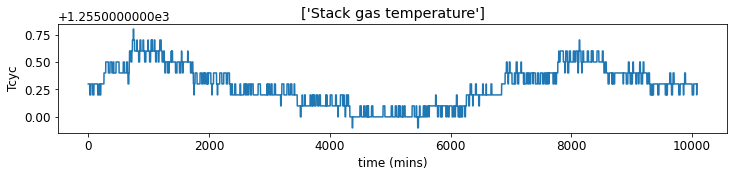

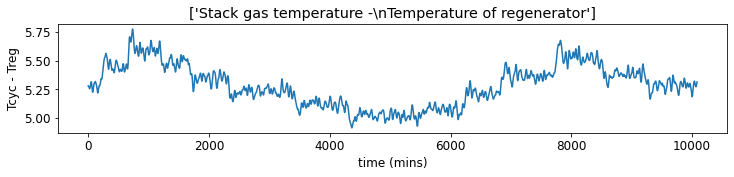

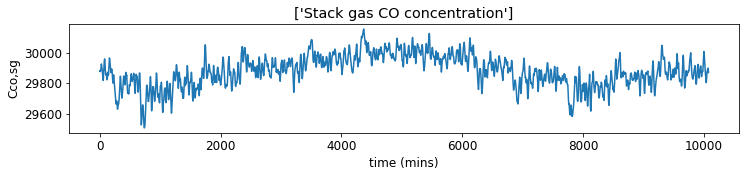

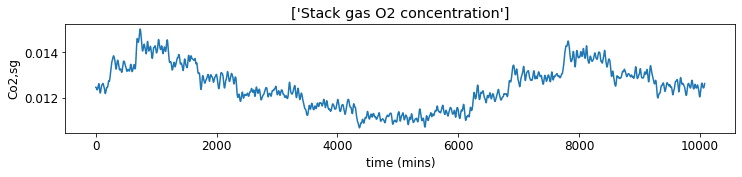

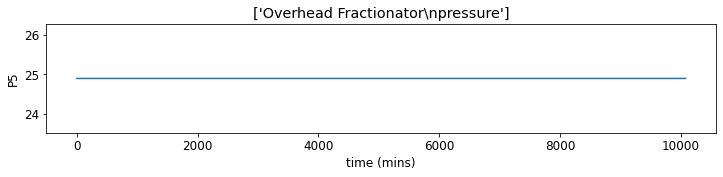

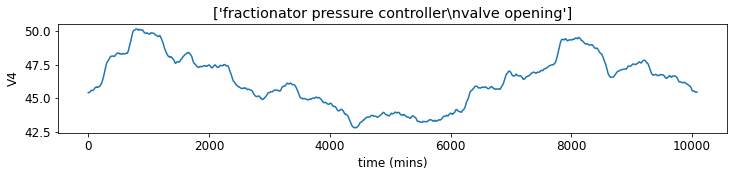

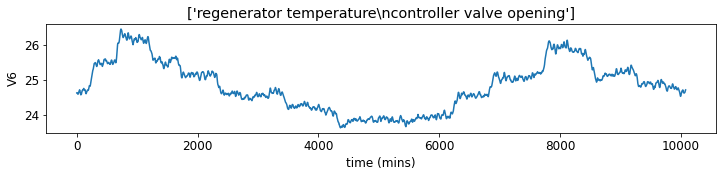

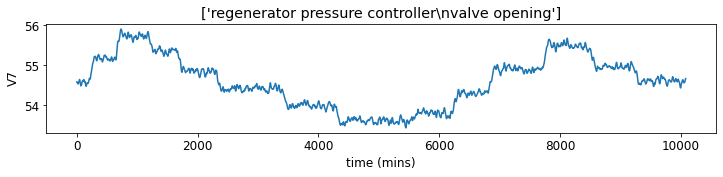

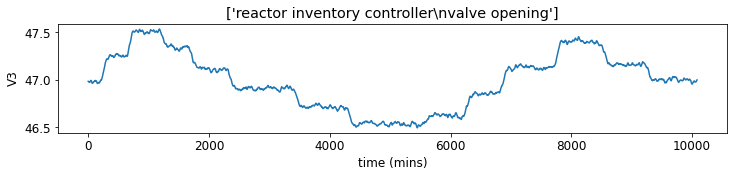

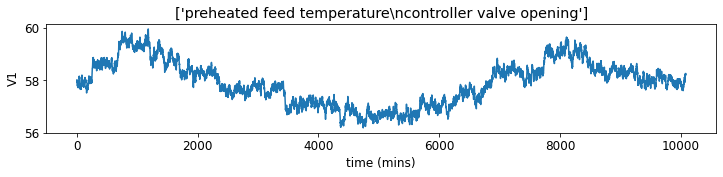

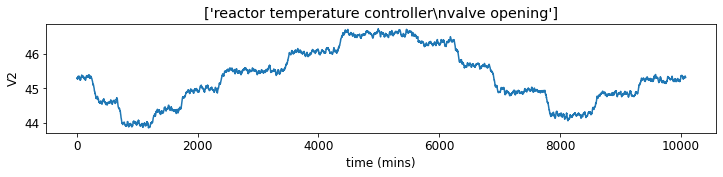

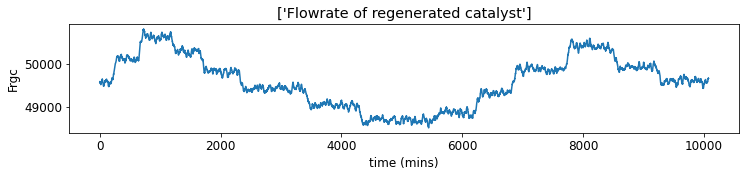

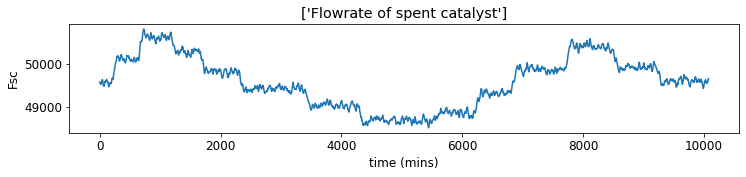

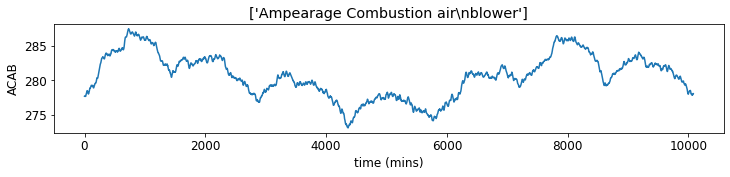

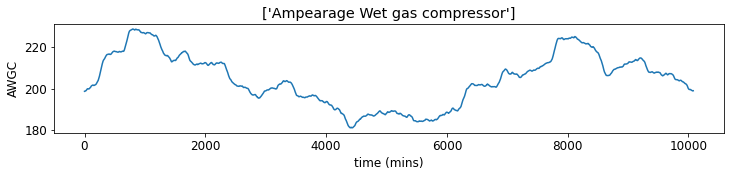

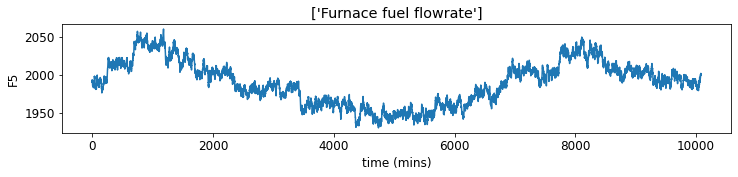

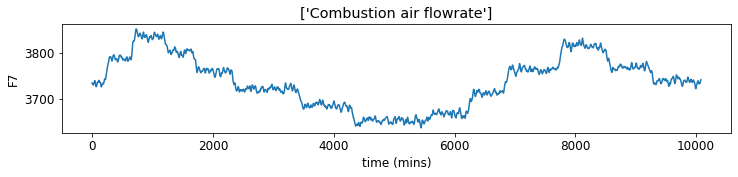

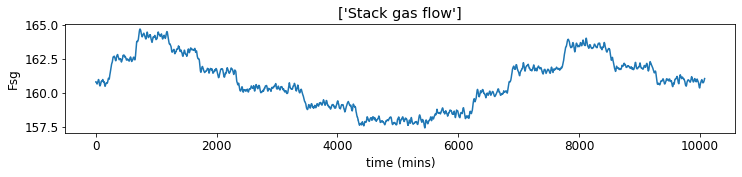

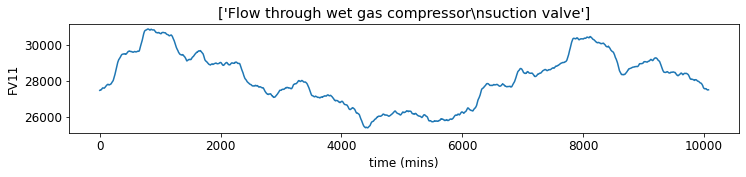

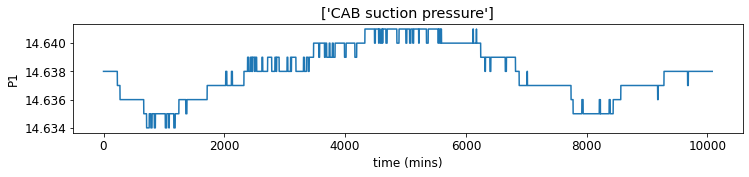

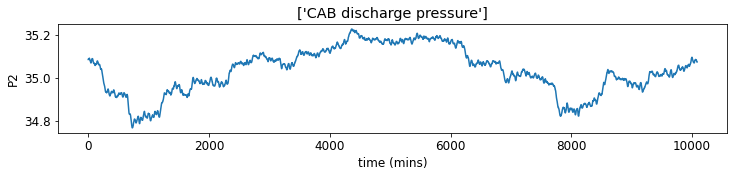

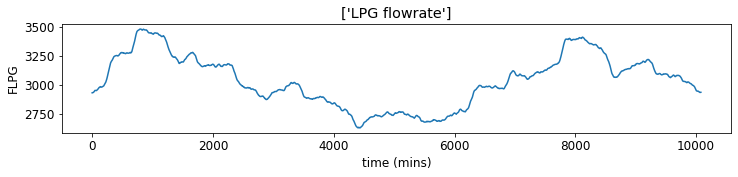

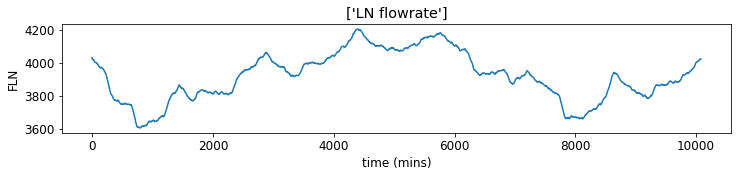

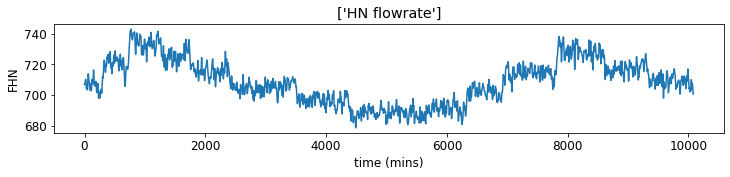

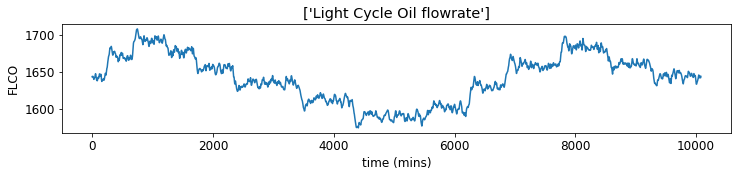

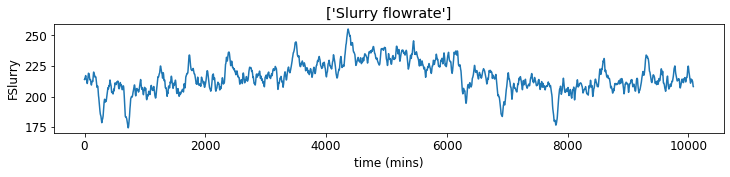

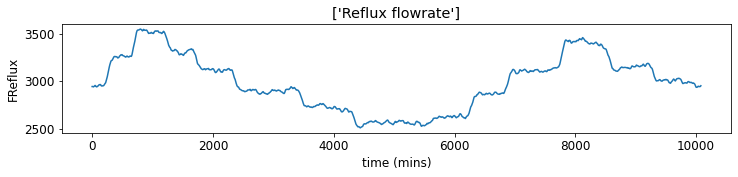

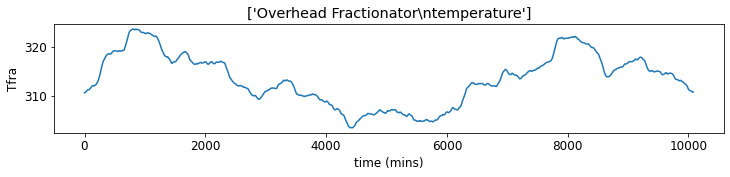

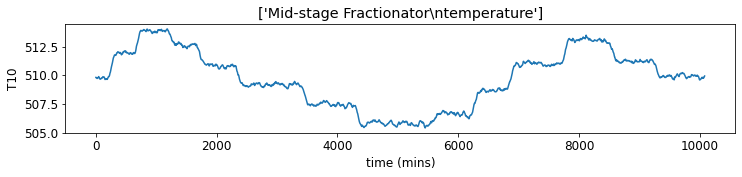

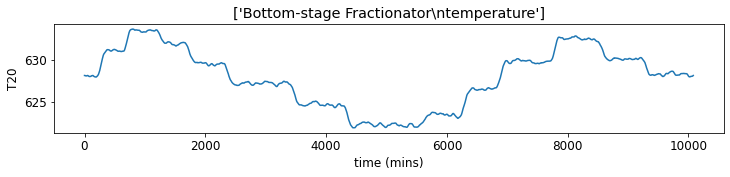

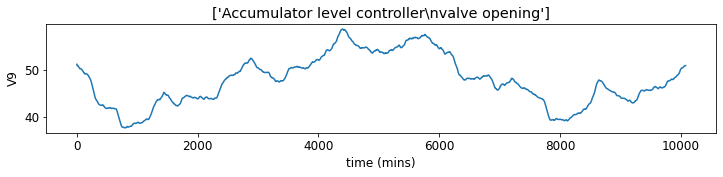

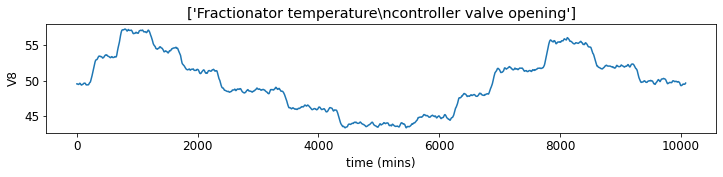

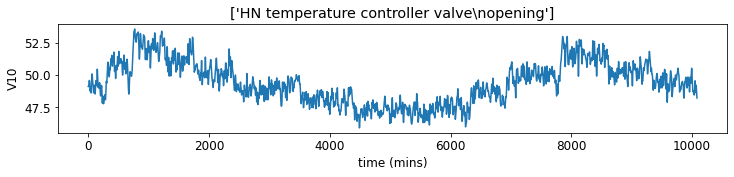

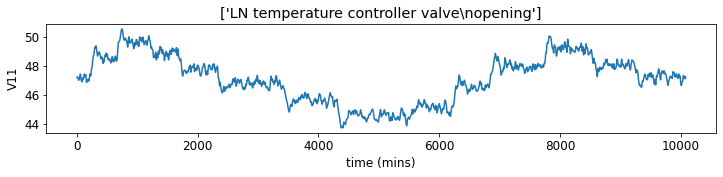

In [10]:
for n,i in enumerate(df_varyingFeedFlow.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_varyingFeedFlow[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

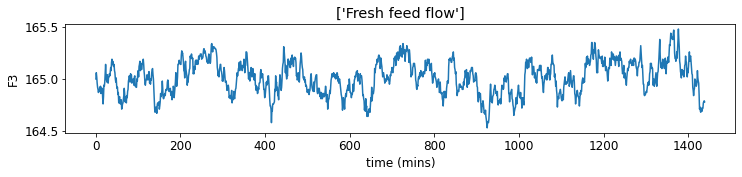

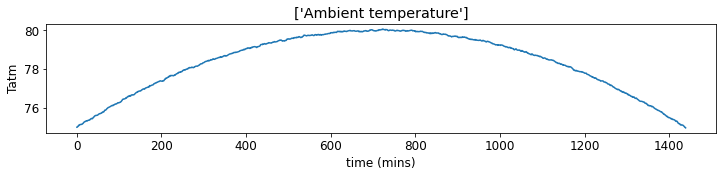

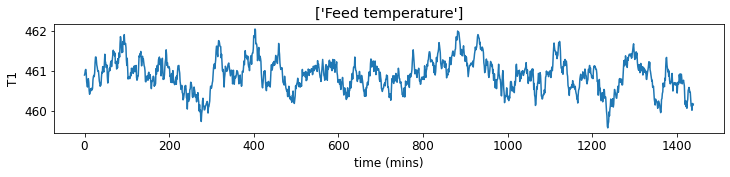

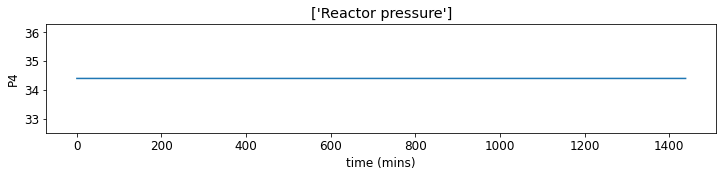

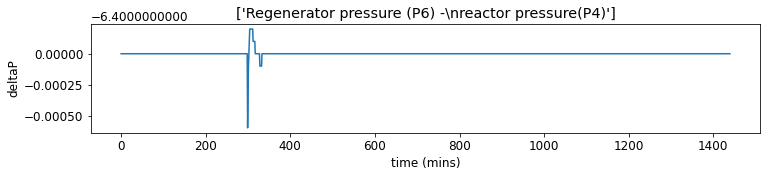

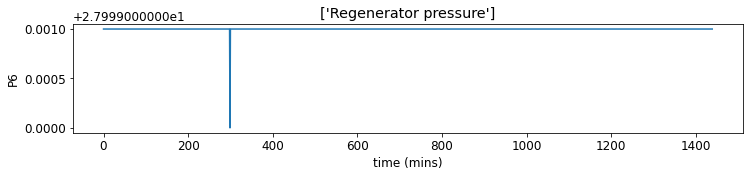

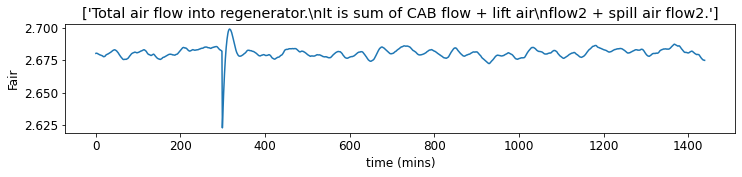

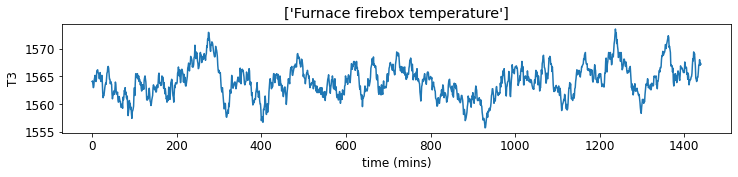

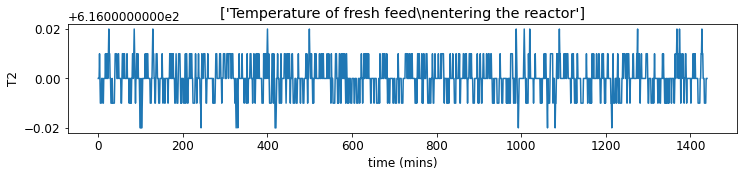

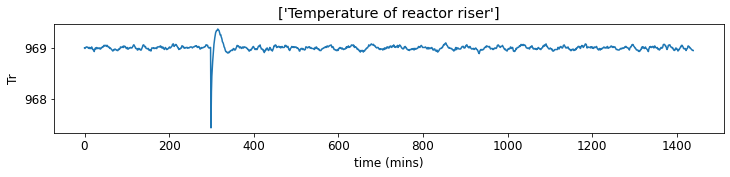

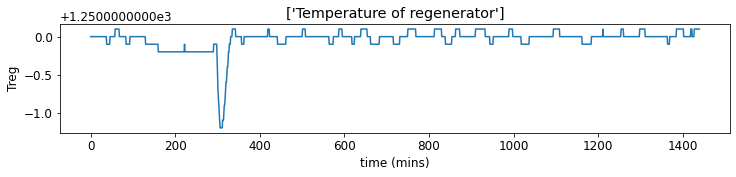

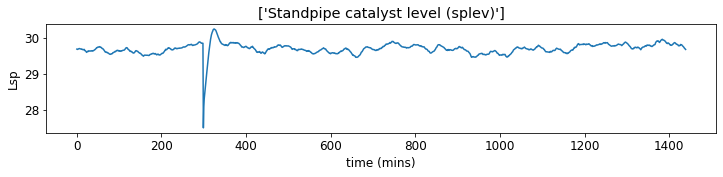

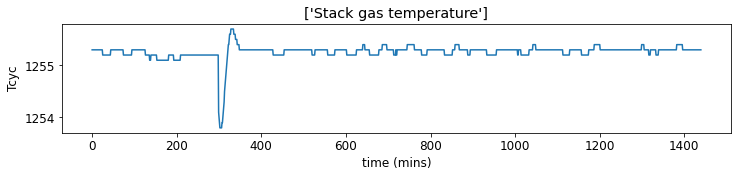

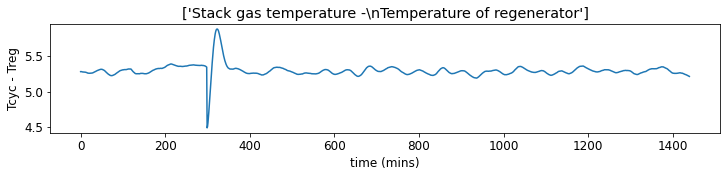

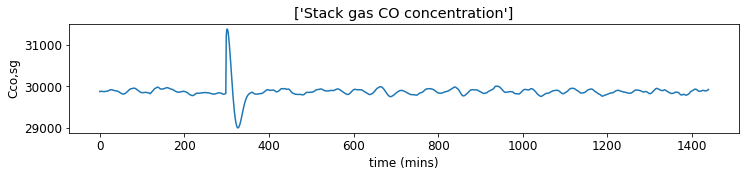

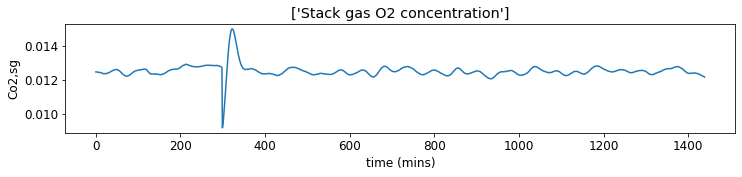

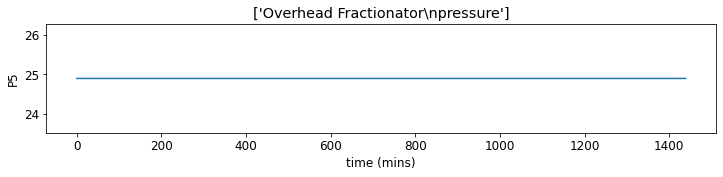

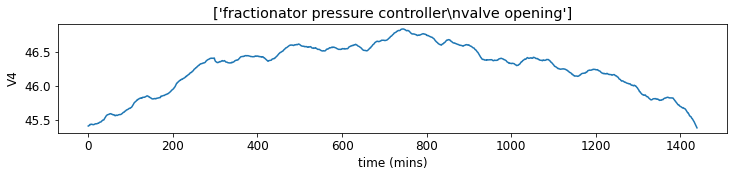

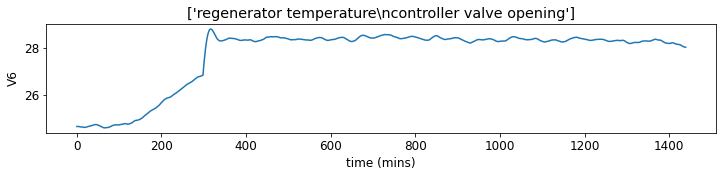

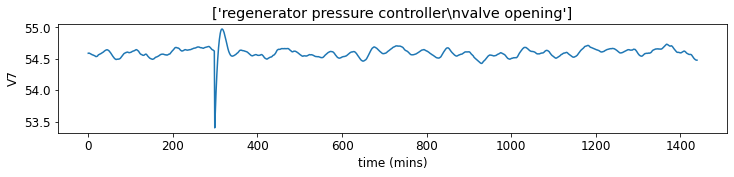

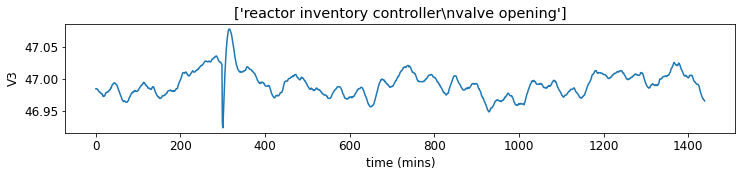

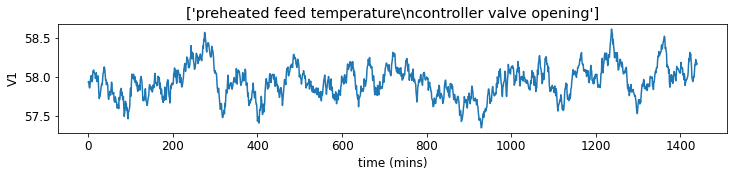

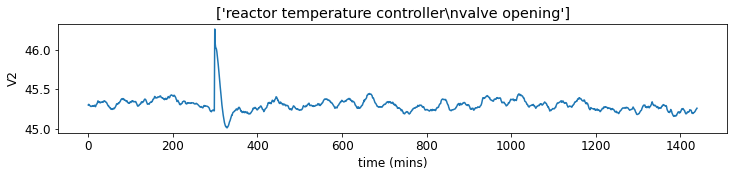

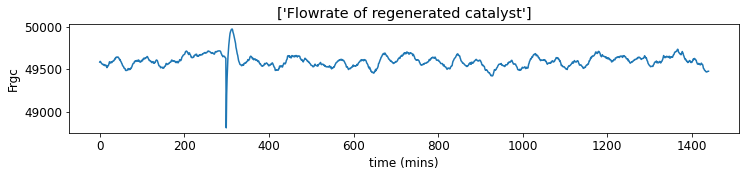

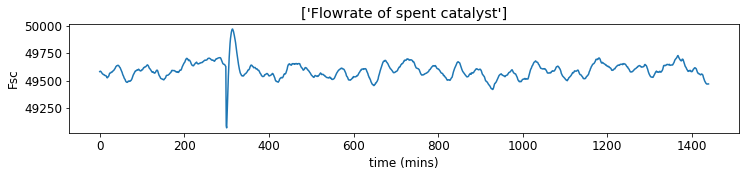

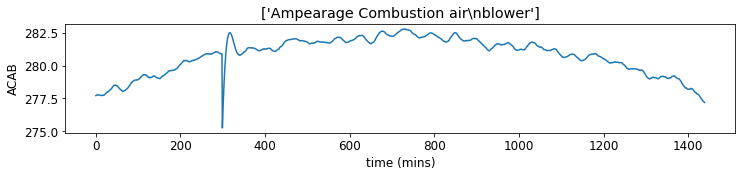

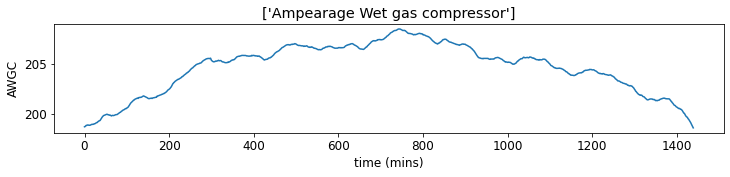

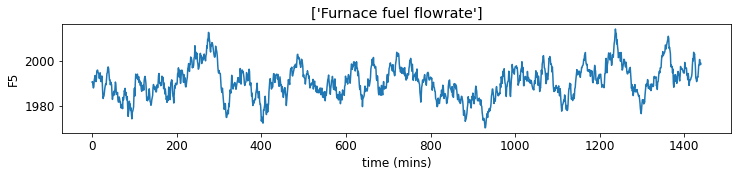

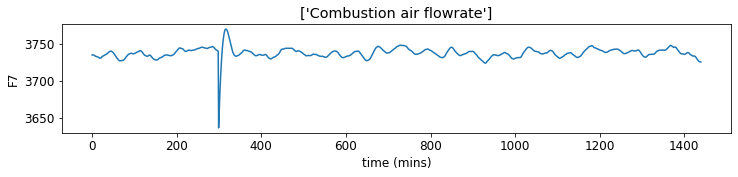

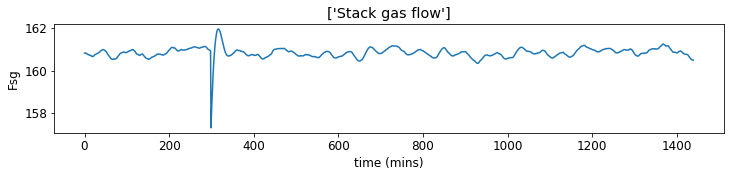

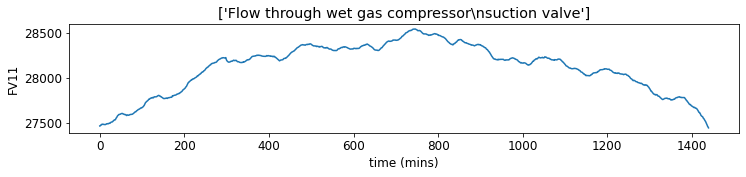

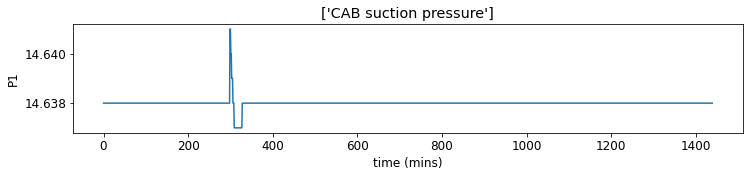

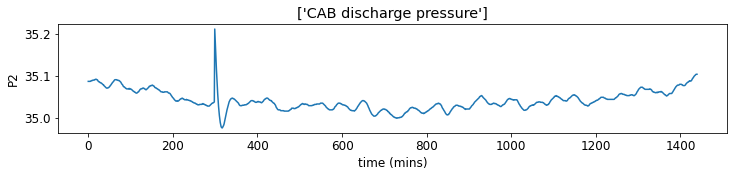

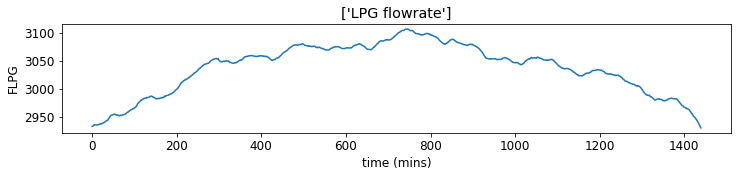

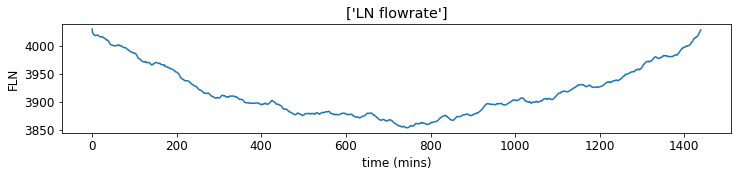

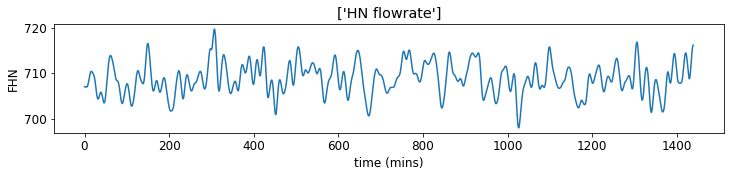

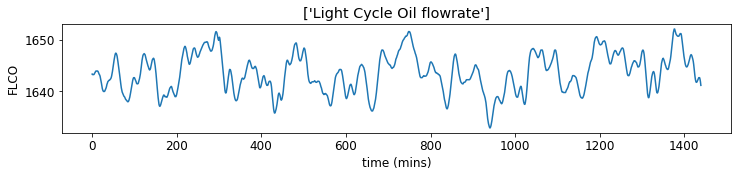

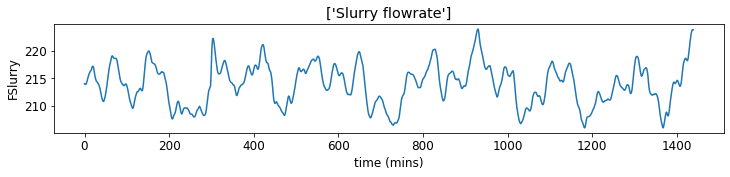

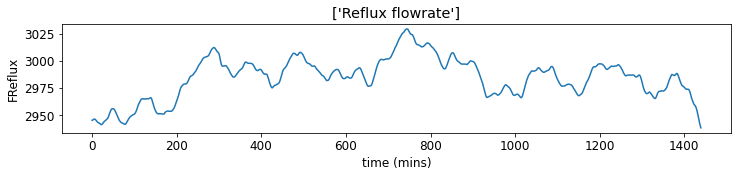

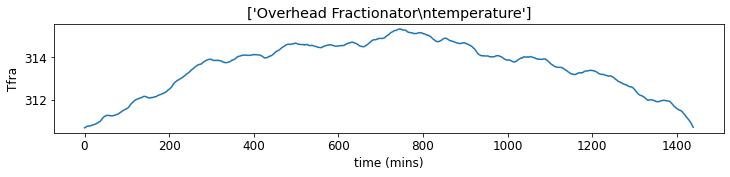

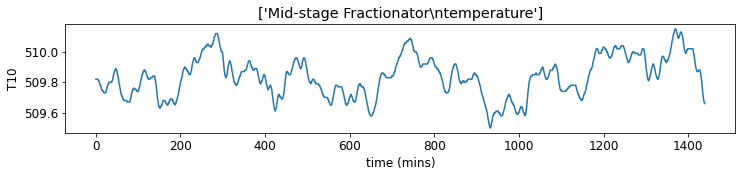

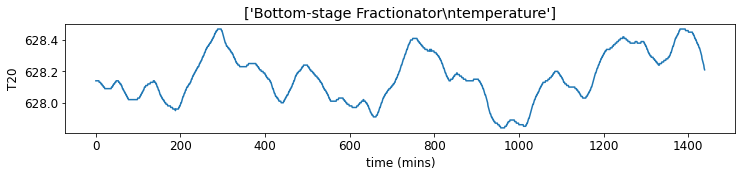

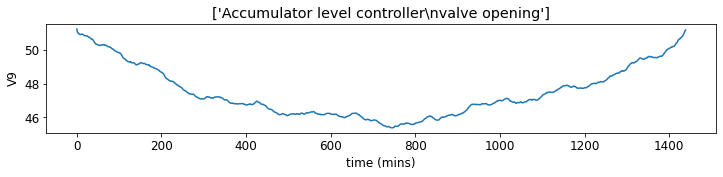

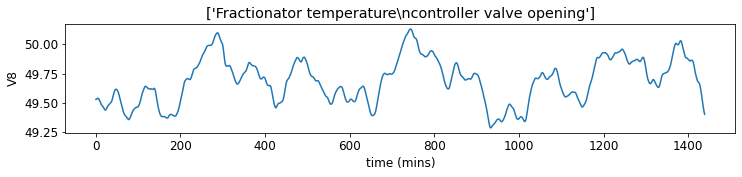

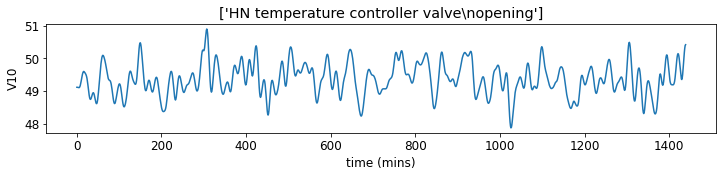

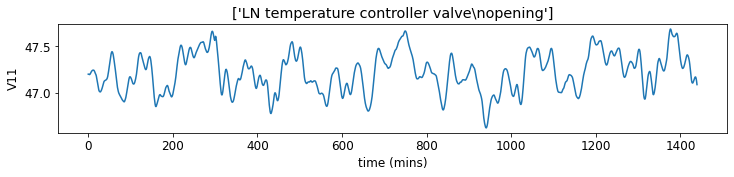

In [11]:
for n,i in enumerate(df_CAB_valveLeak.columns):
    plt.figure(figsize=(12,2))
    plt.plot(df_CAB_valveLeak[i])
    plt.xlabel('time (mins)')
    plt.ylabel(i)
    plt.title(df[df['Symbol']==i]['Description'].values)
    plt.show()

**Scaling the data with mean=0 & std = 1 using Standard Scalar.**

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [13]:
X = ss.fit_transform(df_stableFeedFlow)

**Applying PCA**

In [14]:
from sklearn.decomposition import PCA
pca = PCA()

In [15]:
X_pca = pca.fit_transform(X)

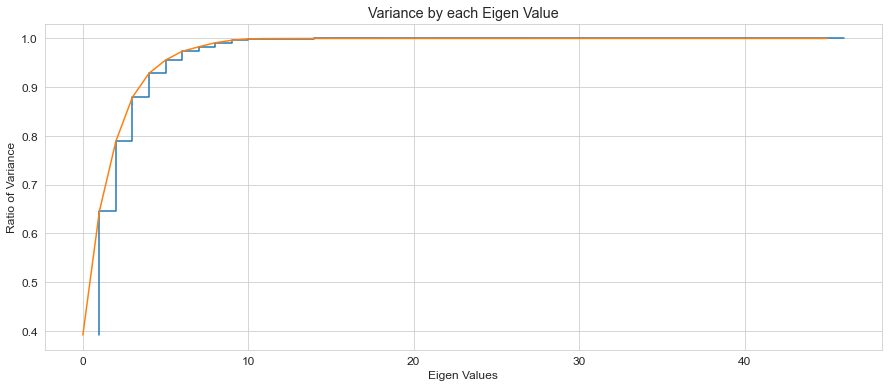

In [16]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,47)), y=np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
sns.lineplot(x=list(range(0,46)),y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance')
plt.title('Variance by each Eigen Value')
plt.show()

It can be clearly seen than 10 dimentions can describe more than 98% data, hence redcing the feature space from 46 to 10.

In [17]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

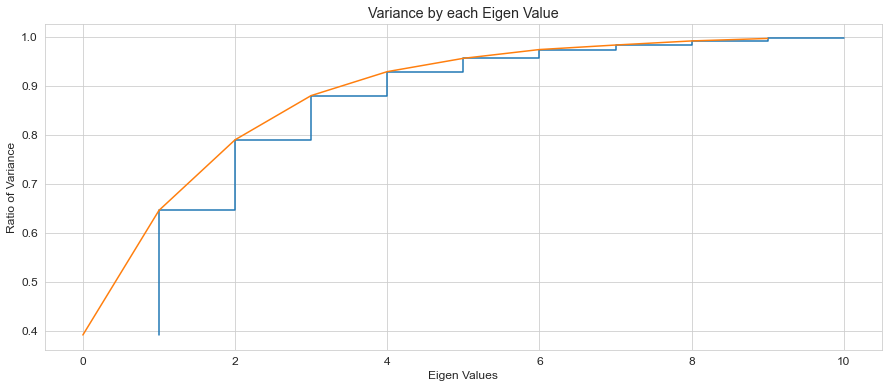

In [18]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.lineplot(x=list(range(1,11)), y=np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
sns.lineplot(x=list(range(0,10)),y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance')
plt.title('Variance by each Eigen Value')
plt.show()

**Applying Autoencoders**

In [19]:
X_train = X.reshape(2880,46,1)

Lets create a Sequential model with Bidirectional LSTM & train the model when plant is in steady state.<br>
To avoid overfitting of model by using 20% dropout.

In [20]:
# del model

In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,return_sequences=True),input_shape=(46,1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 46, 512)           528384    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 46, 512)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 46, 256)           656384    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 46, 256)           0         
                                                                 
 dense (Dense)               (None, 46, 1)             257       
                                                                 
Total params: 1185025 (4.52 MB)
Trainable params: 118502

In [22]:
model.fit(X_train,X_train,epochs=30)

Epoch 1/30
90/90 [==============================] - 56s 493ms/step - loss: 0.1484 - mae: 0.2095
Epoch 2/30
90/90 [==============================] - 48s 538ms/step - loss: 0.0029 - mae: 0.0376
Epoch 3/30
90/90 [==============================] - 30s 333ms/step - loss: 0.0025 - mae: 0.0338
Epoch 4/30
90/90 [==============================] - 22s 245ms/step - loss: 0.0022 - mae: 0.0316
Epoch 5/30
90/90 [==============================] - 23s 252ms/step - loss: 0.0020 - mae: 0.0301
Epoch 6/30
90/90 [==============================] - 27s 305ms/step - loss: 0.0019 - mae: 0.0291
Epoch 7/30
90/90 [==============================] - 40s 441ms/step - loss: 0.0018 - mae: 0.0281
Epoch 8/30
90/90 [==============================] - 40s 440ms/step - loss: 0.0018 - mae: 0.0276
Epoch 9/30
90/90 [==============================] - 40s 444ms/step - loss: 0.0017 - mae: 0.0270
Epoch 10/30
90/90 [==============================] - 39s 438ms/step - loss: 0.0017 - mae: 0.0267
Epoch 11/30
90/90 [====================

**Calculating the Reconstruction error using MAE.**<br>
Considering 99 percentile of error as an acceptable range, and it signifies the steady state operation.

In [23]:
error_ae = []
for i in range(X.shape[0]):
    y_pred = model.predict(X[i].reshape(1,46,1),verbose=None)[0,:,0]
    error_ae.append(np.abs(X[i]-y_pred).sum())
AE_CL = np.percentile(error_ae,99)

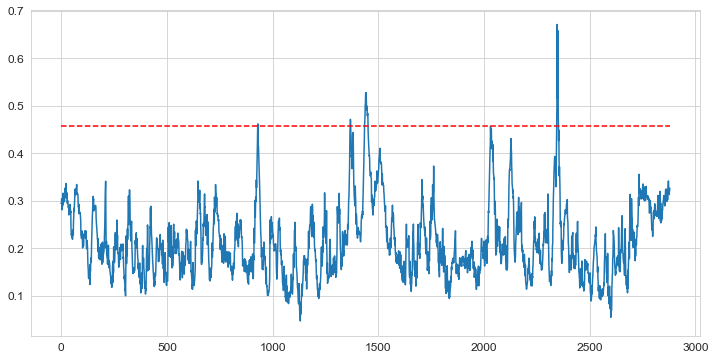

In [24]:
pd.Series(error_ae).plot()
plt.hlines(AE_CL,0,len(error_ae),colors='red',linestyles='--')

**Calculating the Reconstruction error using Q-test, T22-test & Cosine similarity.**<br>
Considering 99 percentile of error as an acceptable range, and it signifies the steady state operation.

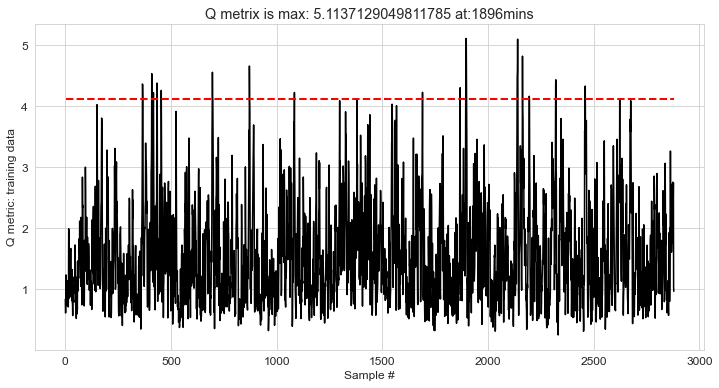

In [25]:
X_reconstructed = np.dot(X_pca,pca.components_)
error_pca = X-X_reconstructed
Q_train = np.sum(np.abs(error_pca),axis=1)
Q_CL = np.percentile(Q_train,99)
# Q_train plot with CL
plt.figure()
plt.plot(Q_train, color='black')
plt.plot([1,len(Q_train)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('Q metric: training data')
plt.title(f'Q metrix is max: {Q_train.max()} at:{Q_train.argmax()}mins')
plt.show()

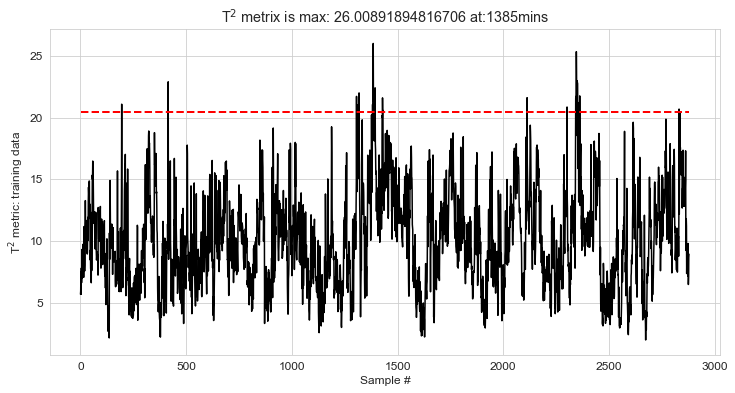

In [26]:
lambda_ = np.diag(pca.explained_variance_)
lambda_inv = np.linalg.inv(lambda_)
T_train = np.zeros(X_pca.shape[0])
for i in range(X_pca.shape[0]):
    T_train[i] = np.dot(np.dot(X_pca[i],lambda_inv),X_pca[i].T)
T_CL = np.percentile(T_train,99)
# T2_train plot with CL
plt.figure()
plt.plot(T_train, color='black')
plt.plot([1,len(T_train)],[T_CL,T_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('T$^2$ metric: training data')
plt.title(f'T$^2$ metrix is max: {np.array(T_train).max()} at:{np.array(T_train).argmax()}mins')
plt.show()

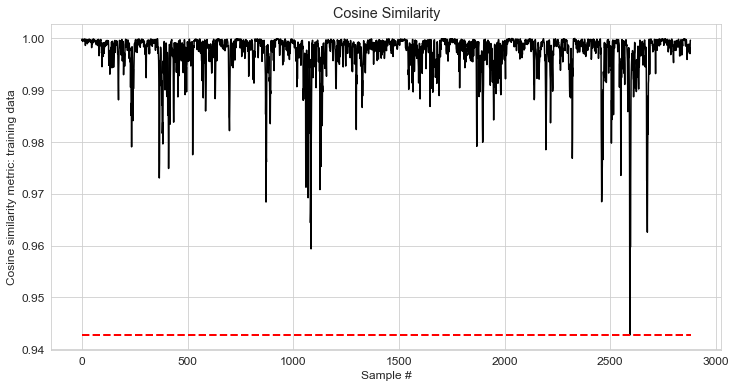

In [27]:
cosine = []
ed = []
for i in range(X.shape[0]):
    v1 = X[i]
    v2 = np.dot(X_pca,pca.components_)[i]
    cosine.append(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
    ed.append(np.linalg.norm(v1 - v2))
C_CL = np.min(cosine)
E_CL = np.percentile(ed,99)
# pd.Series(ed).plot(color='black')
# plt.plot([1,len(ed)],[E_CL,E_CL], linestyle='--',color='red', linewidth=2)
# plt.show()
pd.Series(cosine).plot(color='black')
plt.plot([1,len(cosine)],[C_CL,C_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('Cosine similarity metric: training data')
plt.title(f'Cosine Similarity')
plt.show()

In [28]:
Q_CL,T_CL,C_CL,E_CL,AE_CL

(4.123113215519088,
 20.424350352568787,
 0.9427550112367161,
 0.9281694746755792,
 0.4572564523844304)

Let's create a function for test data preprocessing and testing the data with our model.

In [29]:
def Q_test(X,X_pca,pca_components_,Q_CL):
    X_reconstructed = np.dot(X_pca,pca_components_)
    error_pca = X-X_reconstructed
    Q_train = np.sum(np.abs(error_pca),axis=1)
    # Q_train plot with CL
    plt.figure()
    plt.plot(Q_train, color='black')
    plt.plot([1,len(Q_train)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('Q metric: training data')
    plt.title(f'Q metrix is max: {Q_train.max()} at:{Q_train.argmax()}mins')
    plt.show()
    return error_pca

In [30]:
def T_test(X_pca,explained_variance_,TCL):
    lambda_ = np.diag(pca.explained_variance_)
    lambda_inv = np.linalg.inv(lambda_)
    T_train = np.zeros(X_pca.shape[0])
    for i in range(X_pca.shape[0]):
        T_train[i] = np.dot(np.dot(X_pca[i],lambda_inv),X_pca[i].T)
    # T2_train plot with CL
    plt.figure()
    plt.plot(T_train, color='black')
    plt.plot([1,len(T_train)],[T_CL,T_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('T$^2$ metric: training data')
    plt.title(f'T$^2$ metrix is max: {np.array(T_train).max()} at:{np.array(T_train).argmax()}mins')
    plt.show()

In [31]:
def cosine(X,X_transformed,pca_components_,C_CL,E_CL):
    cosine = []
    ed = []
    for i in range(X.shape[0]):
        v1 = X[i]
        v2 = np.dot(X_transformed,pca_components_)[i]
        cosine.append(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
        ed.append(np.linalg.norm(v1 - v2))
#     pd.Series(ed).plot(color='black')
#     plt.plot([1,len(ed)],[E_CL,E_CL], linestyle='--',color='red', linewidth=2)
#     plt.xlabel('Sample #')
#     plt.ylabel('Eucledian Distance metric: training data')
#     plt.show()
    pd.Series(cosine).plot(color='black')
    plt.plot([1,len(cosine)],[C_CL,C_CL], linestyle='--',color='red', linewidth=2)
    plt.xlabel('Sample #')
    plt.ylabel('Cosine similarity metric: training data')
    plt.title(f'Cosine Similarity')
    plt.show()

In [32]:
def autoencoder(df_test,CL):
    X_test = ss.transform(df_test)
    error_ae = []
    error_sum = []
    for i in range(X_test.shape[0]):
        y_pred = model.predict(X_test[i].reshape(1,46,1),verbose=None)[0,:,0]
        error_ae.append(np.abs(X_test[i]-y_pred))
        error_sum.append(np.abs(X_test[i]-y_pred).sum())
    error_ae=np.array(error_ae)
    pd.Series(error_sum).plot(color = 'black')
    plt.hlines(CL,0,len(error_ae),colors='red',linestyles='--')
    plt.xlabel('Sample #')
    plt.ylabel('Reconstruction error by Autoencoder')
    return error_ae

## **Testing the model on Varying feed flow rate.**

In [33]:
X = ss.transform(df_varyingFeedFlow)
X_test = pca.transform(X)

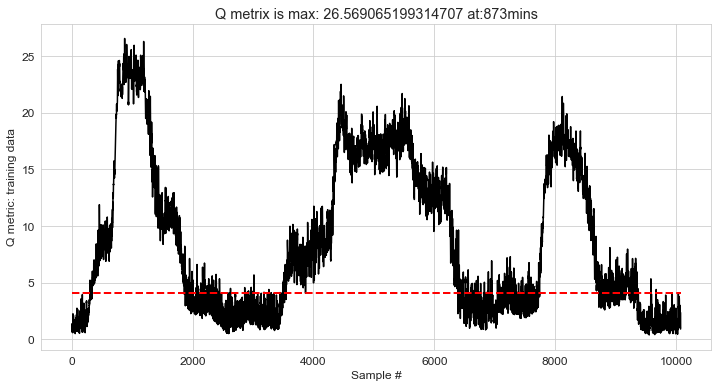

In [34]:
error_pca = Q_test(X,X_test,pca.components_,Q_CL)

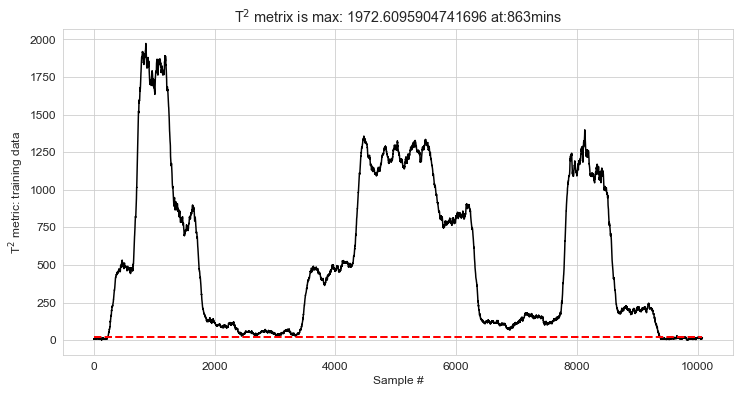

In [35]:
T_test(X_test,pca.explained_variance_,T_CL)

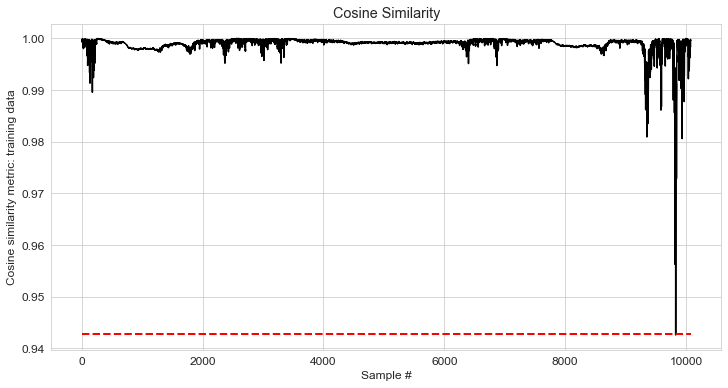

In [36]:
cosine(X,X_test,pca.components_,C_CL,E_CL)

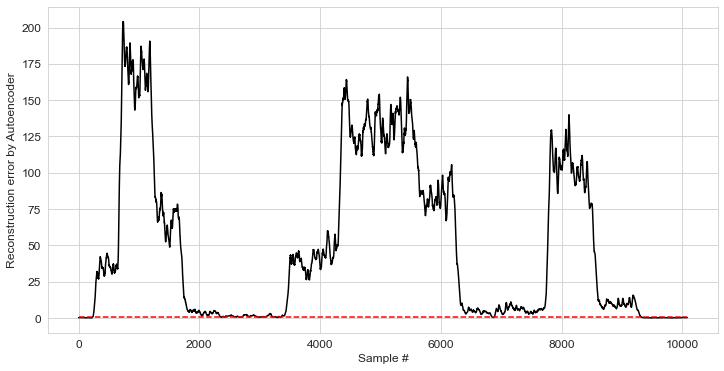

In [37]:
error_ae = autoencoder(df_varyingFeedFlow,AE_CL)

## **Testing the model on abnormal dataset.**

In [38]:
X = ss.transform(df_CAB_valveLeak)
X_test = pca.transform(X)

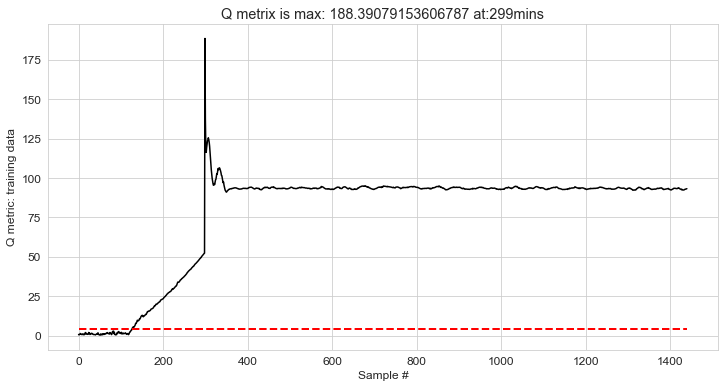

In [39]:
error_pca = Q_test(X,X_test,pca.components_,Q_CL)

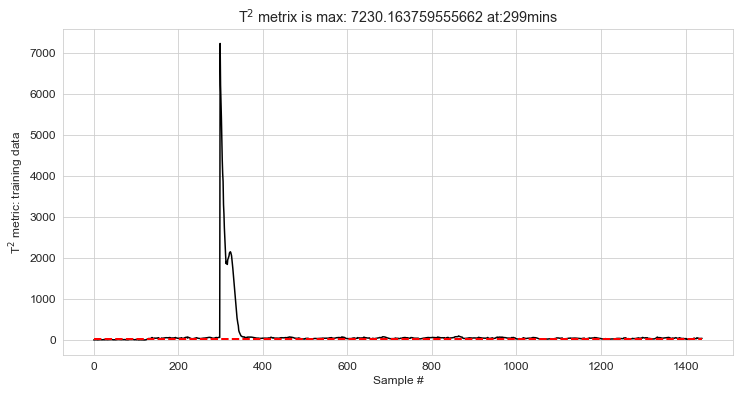

In [40]:
T_test(X_test,pca.explained_variance_,T_CL)

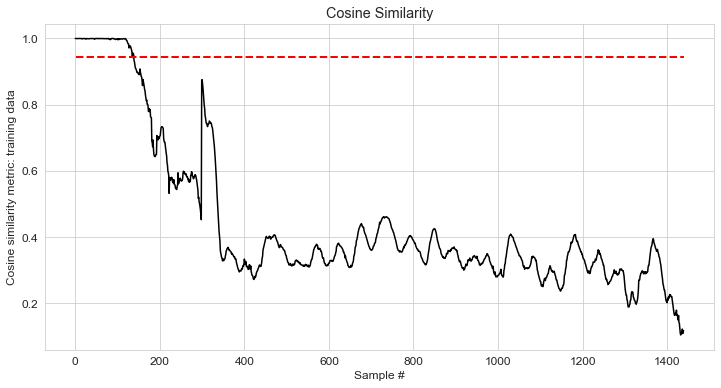

In [41]:
cosine(X,X_test,pca.components_,C_CL,E_CL)

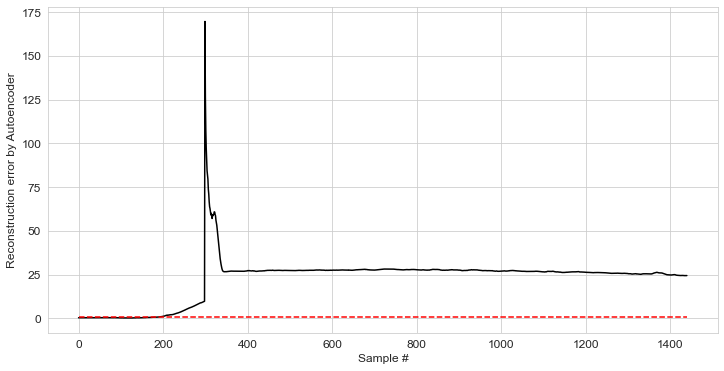

In [42]:
error_ae = autoencoder(df_CAB_valveLeak,AE_CL)

**Inference**<br>
During steady state operation the errors are within limit but, suddenly the error starts increasing after 150 mins.<br>
So, let’s check which parameters are deviating maximum form steady state.<br>
Considering top 10 variables responsible for plant deviation.

## **Visualization**

**Q test Error**

In [43]:
#%% Q contribution
error = np.abs(error_pca).sum(axis=1)
cum = []
for index,value in enumerate(error):
    if (value>Q_CL) and (len(cum)<15):
        previous_val = value
        cum.append(value)
        if len(cum) == 15:
            sample = index
            break
    else:
        cum=[]
# sample = ((pd.Series(error_pca.sum(axis=1))-pd.Series(error_pca.sum(axis=1)).shift()).abs()).argmax()
print('Time-',sample,'mins')
error_test_sample = error_pca[sample]
Q_contri = np.abs(error_test_sample) # *error_test_sample # vector of contributions

Time- 141 mins


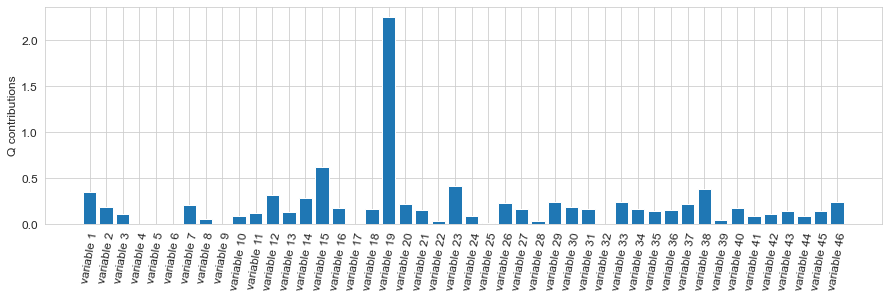

In [44]:
plt.figure(figsize=[15,4])
plt.bar(['variable ' + str((i+1)) for i in range(len(Q_contri))], Q_contri)
plt.xticks(rotation = 80)
plt.ylabel('Q contributions')
plt.show()

Time- 141 mins


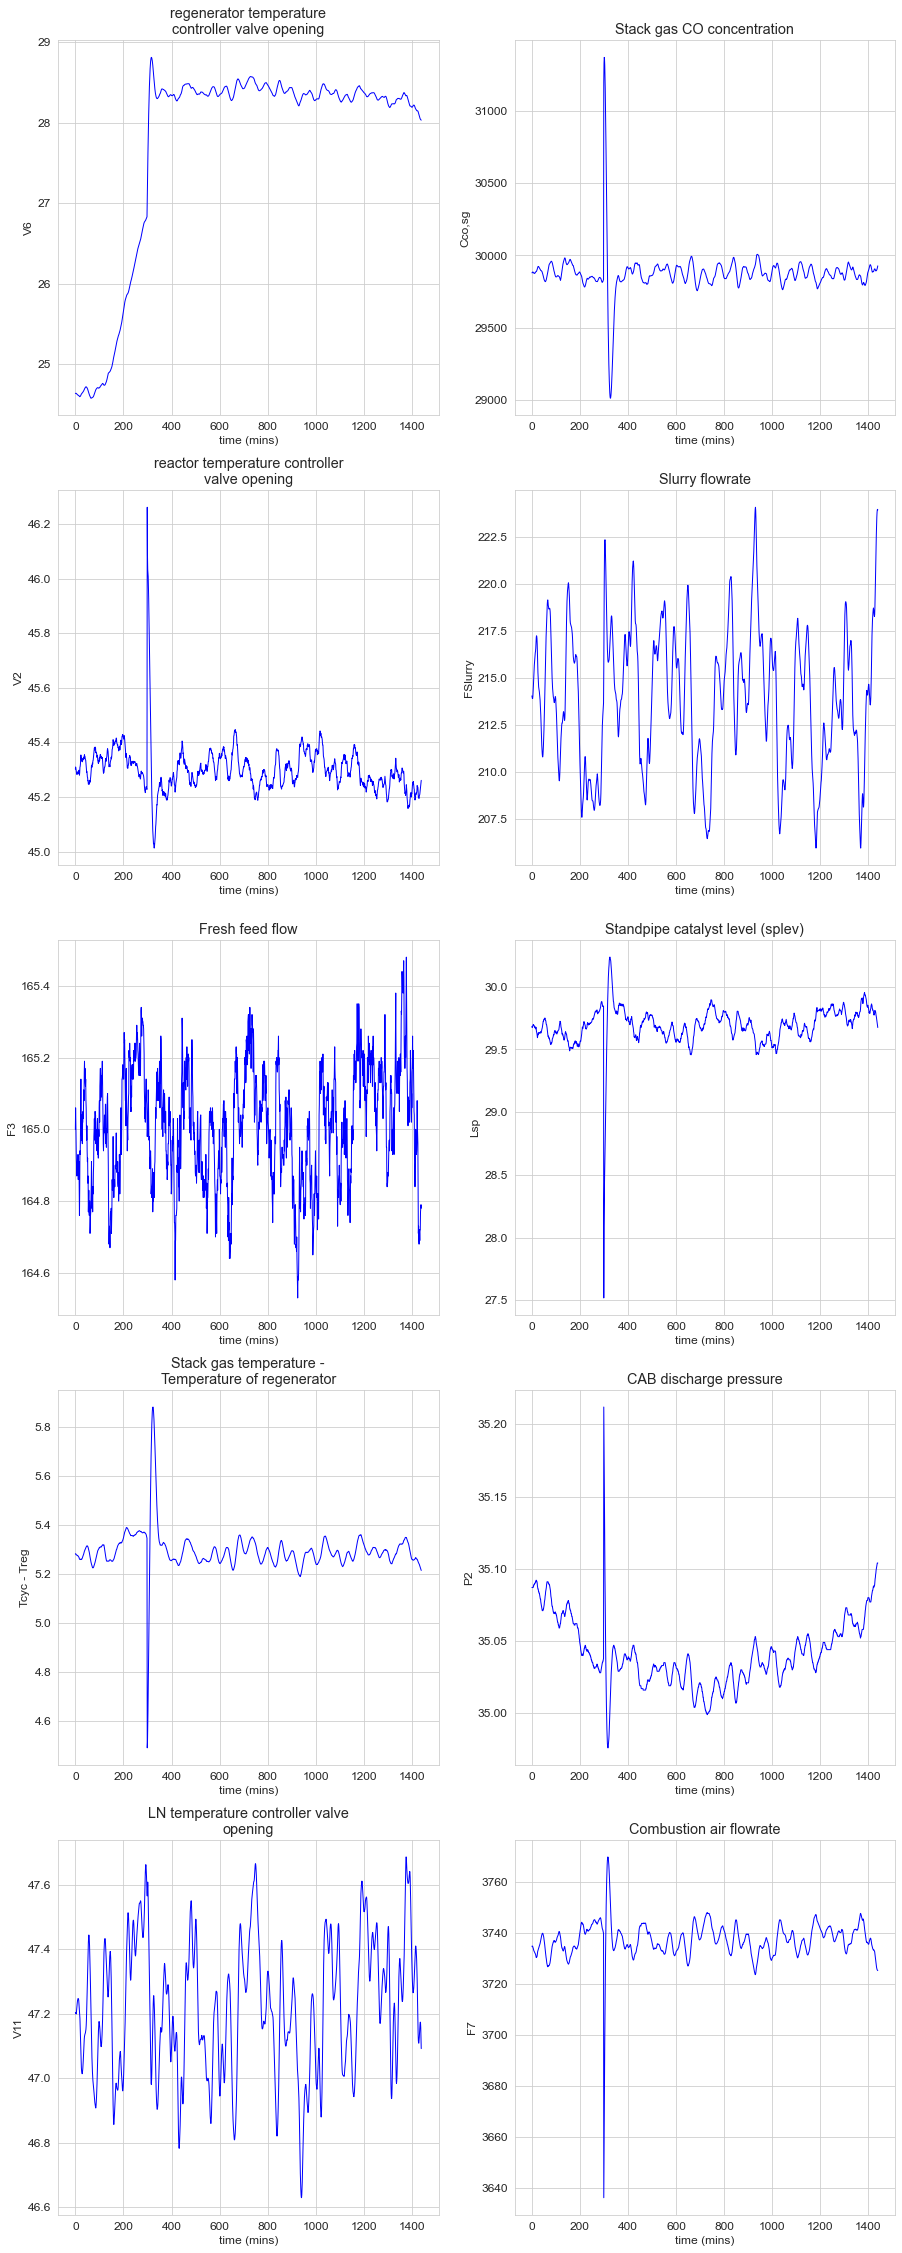

In [46]:
plt.figure(figsize=(15,40))
print('Time-',sample,'mins')
for i,n in enumerate(np.argsort(Q_contri)[:-11:-1]):
    plt.subplot(5,2,i+1)
    plt.plot(df_CAB_valveLeak.iloc[:,n],'blue', linewidth=1)
    plt.xlabel('time (mins)')
    plt.ylabel(df['Symbol'][n])
    plt.title(df['Description'][n])
    plt.show

**Autoecoder Error**

In [47]:
#%% Autoencoder Error
error = np.abs(error_ae).sum(axis=1)
cum = []
for index,value in enumerate(error):
    if (value>AE_CL) and (len(cum)<15):
        previous_val = value
        cum.append(value)
        if len(cum) == 15:
            sample = index
            break
    else:
        cum=[]
# sample = ((pd.Series(error_ae.sum(axis=1))-pd.Series(error_ae.sum(axis=1)).shift()).abs()).argmax()
print('Time-',sample,'mins')
error_test_sample = error_pca[sample]
Q_contri = np.abs(error_test_sample) # *error_test_sample # vector of contributions

Time- 186 mins


Time- 186 mins


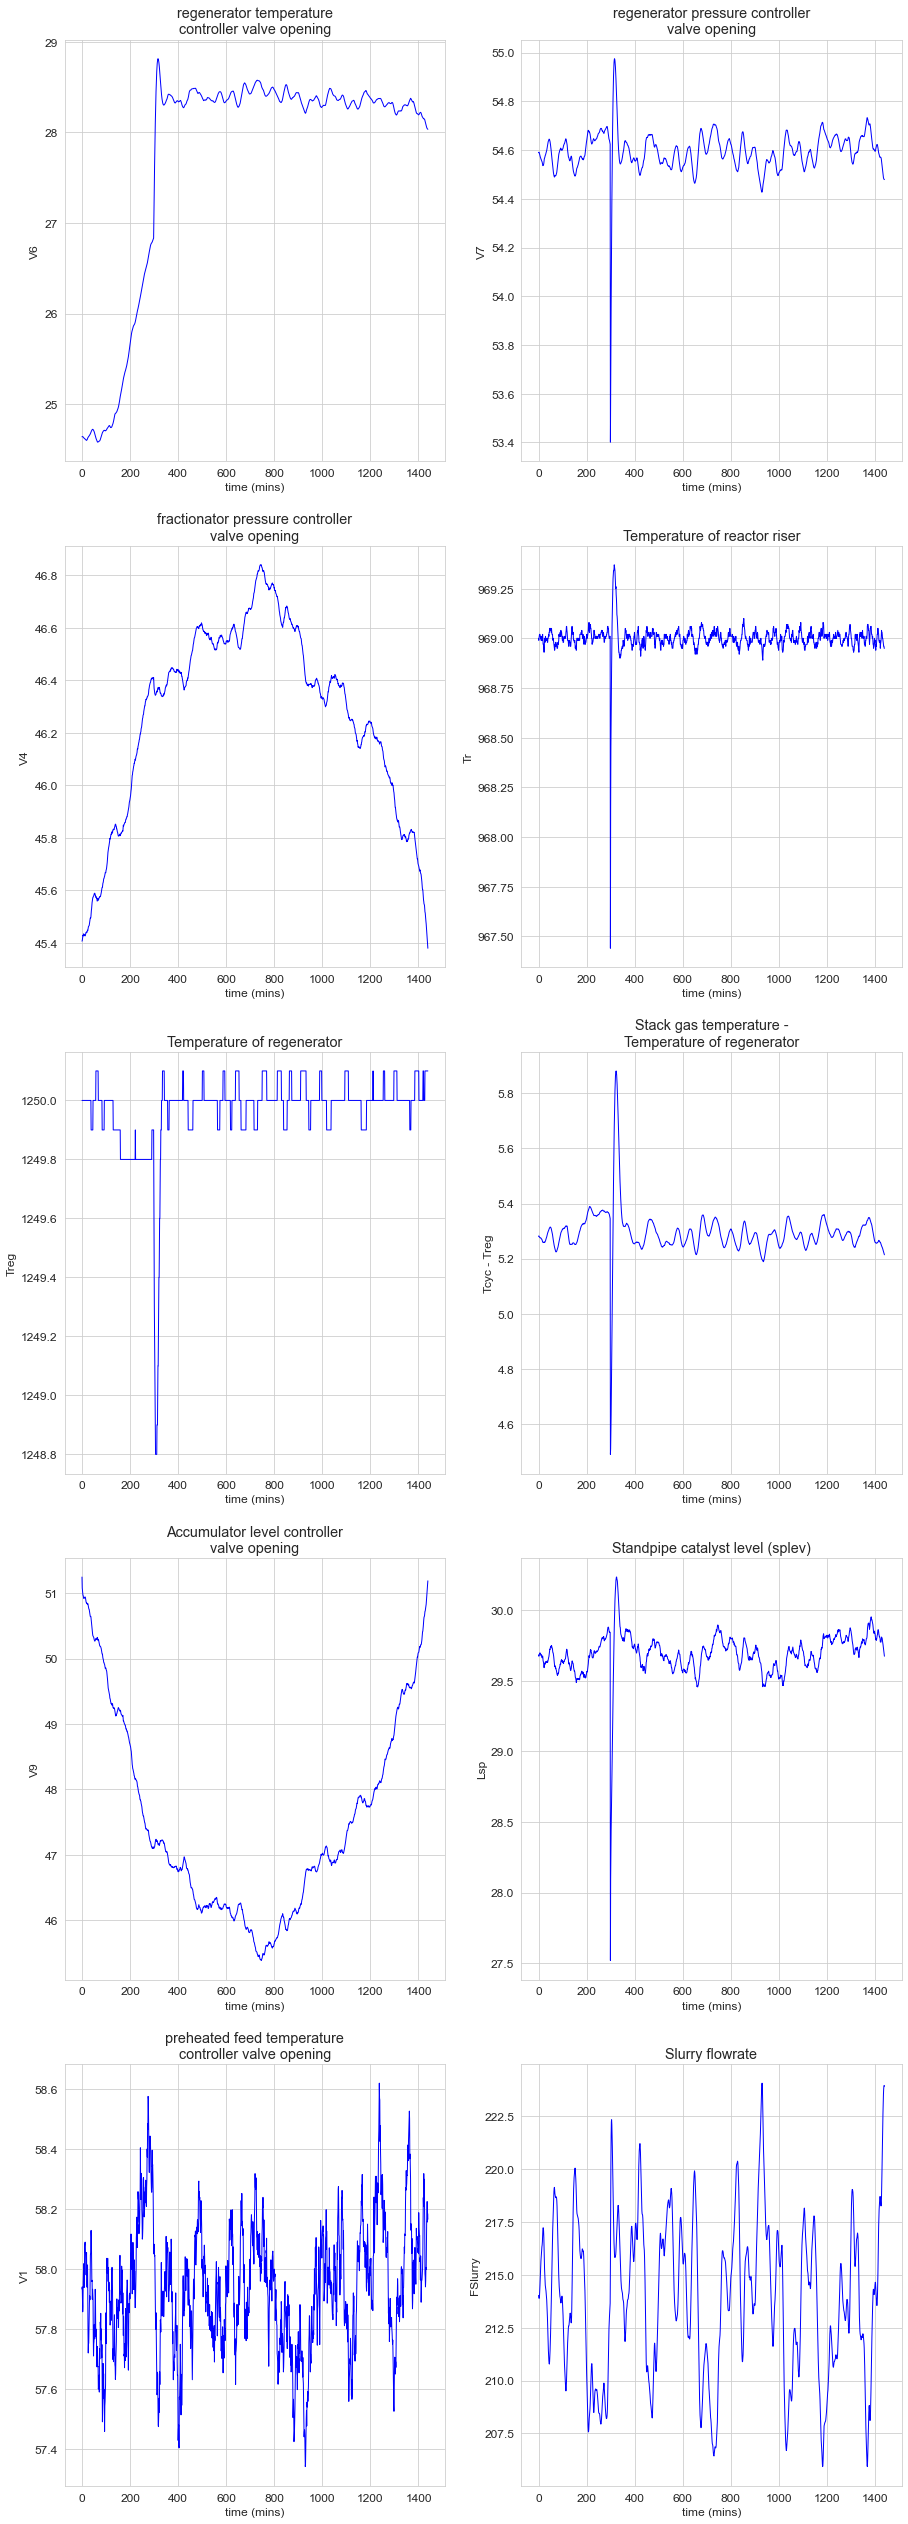

In [48]:
plt.figure(figsize=(15,45))
print('Time-',sample,'mins')
for i,n in enumerate(np.argsort(error_ae[sample])[:-11:-1]):
    plt.subplot(5,2,i+1)
    plt.plot(df_CAB_valveLeak.iloc[:,n],'blue', linewidth=1)
    plt.xlabel('time (mins)')
    plt.ylabel(df['Symbol'][n])
    plt.title(df['Description'][n])
    plt.show

# **Conclusion**
Regenerator temperature Control Valve has suddenly increased which means there an abnormal situation where catalyst gets cooling and to maintain catalyst temperature air flow is increased.<br>
There is a possibility of behind the burn or air flow rate is decreased, since trends shows a stable catalyst flow and reactor temperature profile till 250 mins whereas air flow CV starts opening at 100 mins.

# **Future Work**

1. Integrate with IoT sensors for real-time anomaly tracking.
2. Develop a predictive maintenance dashboard using Power BI.